#### Arnau Añols Bordas ####
#### NIU: 1603271 ####

## PREPROCESSING ##

### DESCRIPCIÓ DEL DATASET ###
El dataset consisteix en 20.000 partides d'escacs extrets de la web Lichess.org.

El dataset conté els 16 atributs següents:
* **id**: id de la partida
* **rated**: si la partida està puntuada (True/False)
* **created_at**: data (amb notació unix time) d'inici de la partida
* **laast_move_at**: data (amb notació unix time) del final de la partida
* **turns**: nombre de torns que ha tingut cada jugador al llarg de la partida
* **victory_status**: quina situació de joc ha acabat la partida (fora de temps, mate, empat, rendició)
* **winner**: resultat de la partida (guanya blanc/negre o empat)
* **increment_code**: temps que té cada jugador en la partida i l'increment que se li dona a aquest temps en cada torn
* **white_id**: id del jugador blanc
* **white_rating**: rating del jugador blanc
* **black_id**: id del jugador negre
* **black_rating**: rating del jugador negre
* **moves**: tots els moviments realitzats a la partida en Standard Chess Notation
* **opening_eco**: jugada inicial codificada en ECO codes
* **opening_name**: nom de la jugada inicial
* **opening_ply**: nombre de moviments de la jugada inicial

Import de les llibreries necessàries

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import category_encoders as ce
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Carreguem el dataset

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [3]:
dataset = load_dataset('games.csv')
data = dataset.values
print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (20058, 16)


In [4]:
dataset.head()

id  rated        created_at      last_move_at  turns victory_status  \
0  TZJHLljE  False 1504210000000.000 1504210000000.000     13      outoftime   
1  l1NXvwaE   True 1504130000000.000 1504130000000.000     16         resign   
2  mIICvQHh   True 1504130000000.000 1504130000000.000     61           mate   
3  kWKvrqYL   True 1504110000000.000 1504110000000.000     61           mate   
4  9tXo1AUZ   True 1504030000000.000 1504030000000.000     95           mate   

  winner increment_code       white_id  white_rating      black_id  \
0  white           15+2       bourgris          1500          a-00   
1  black           5+10           a-00          1322     skinnerua   
2  white           5+10         ischia          1496          a-00   
3  white           20+0  daniamurashov          1439  adivanov2009   
4  white           30+3      nik221107          1523  adivanov2009   

   black_rating                                              moves  \
0          1191  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1          1261  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2          1500  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3          1454  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4          1469  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

  opening_eco                            opening_name  opening_ply  
0         D10        Slav Defense: Exchange Variation            5  
1         B00  Nimzowitsch Defense: Kennedy Variation            4  
2         C20   King's Pawn Game: Leonardis Variation            3  
3         D02  Queen's Pawn Game: Zukertort Variation            3  
4         C41                        Philidor Defense            5

Veiem que hi ha alguns atributs categòrics i alguns no numèrics.

### NETEJA DE DADES ###

Buscar i corregir valors desconeguts, passar atributs de text a numèrics i codificar si cal atributs categòrics.

In [5]:
dataset.nunique() < 5

id                False
rated              True
created_at        False
last_move_at      False
turns             False
victory_status     True
winner             True
increment_code    False
white_id          False
white_rating      False
black_id          False
black_rating      False
moves             False
opening_eco       False
opening_name      False
opening_ply       False
dtype: bool

In [6]:
dataset.nunique()

id                19113
rated                 2
created_at        13151
last_move_at      13186
turns               211
victory_status        4
winner                3
increment_code      400
white_id           9438
white_rating       1516
black_id           9331
black_rating       1521
moves             18920
opening_eco         365
opening_name       1477
opening_ply          23
dtype: int64

Mirem el nombre de valors desconeguts que té cada atribut

In [7]:
llargada= len(dataset)

print("id:", (int(len(dataset[dataset["id"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["id"]=="?"])))/llargada)*100, 1),"%")

print("rated:", (int(len(dataset[dataset["rated"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["rated"]=="?"])))/llargada)*100, 1),"%")

print("created at:", (int(len(dataset[dataset["created_at"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["created_at"]=="?"])))/llargada)*100, 1),"%")

print("last move at:", (int(len(dataset[dataset["last_move_at"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["last_move_at"]=="?"])))/llargada)*100, 1),"%")

print("turns:", (int(len(dataset[dataset["turns"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["turns"]=="?"])))/llargada)*100, 1),"%")

print("victory status:", (int(len(dataset[dataset["victory_status"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["victory_status"]=="?"])))/llargada)*100, 1),"%")

print("winner:", (int(len(dataset[dataset["winner"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["winner"]=="?"])))/llargada)*100, 1),"%")

print("increment code:", (int(len(dataset[dataset["increment_code"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["increment_code"]=="?"])))/llargada)*100, 1),"%")

print("white rating:", (int(len(dataset[dataset["white_rating"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["white_rating"]=="?"])))/llargada)*100, 1),"%")

print("white id:", (int(len(dataset[dataset["white_id"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["white_id"]=="?"])))/llargada)*100, 1),"%")

print("black rating:", (int(len(dataset[dataset["black_rating"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["black_rating"]=="?"])))/llargada)*100, 1),"%")

print("black id:", (int(len(dataset[dataset["black_id"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["black_id"]=="?"])))/llargada)*100, 1),"%")

print("moves:", (int(len(dataset[dataset["moves"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["moves"]=="?"])))/llargada)*100, 1),"%")

print("opening eco:", (int(len(dataset[dataset["opening_eco"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["opening_eco"]=="?"])))/llargada)*100, 1),"%")

print("opening name:", (int(len(dataset[dataset["opening_name"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["opening_name"]=="?"])))/llargada)*100, 1),"%")

print("opening ply:", (int(len(dataset[dataset["opening_ply"]=="?"]))), "valors desconeguts, ",
      round(((int(len(dataset[dataset["opening_ply"]=="?"])))/llargada)*100, 1),"%")


id: 0 valors desconeguts,  0.0 %
rated: 0 valors desconeguts,  0.0 %
created at: 0 valors desconeguts,  0.0 %
last move at: 0 valors desconeguts,  0.0 %
turns: 0 valors desconeguts,  0.0 %
victory status: 0 valors desconeguts,  0.0 %
winner: 0 valors desconeguts,  0.0 %
increment code: 0 valors desconeguts,  0.0 %
white rating: 0 valors desconeguts,  0.0 %
white id: 0 valors desconeguts,  0.0 %
black rating: 0 valors desconeguts,  0.0 %
black id: 0 valors desconeguts,  0.0 %
moves: 0 valors desconeguts,  0.0 %
opening eco: 0 valors desconeguts,  0.0 %
opening name: 0 valors desconeguts,  0.0 %
opening ply: 0 valors desconeguts,  0.0 %


Converteixo els atributs de text en numèrics i els categòrics al que pertoqui

In [8]:
# Transformar l'atribut rated a binari (True = 1, False = 0)

dataset["rated_bi"] = np.where(dataset["rated"] == True , 1, 0)

In [9]:
# Transformació dels atributs 'created_at' i 'last_move_at' en un de únic anomenat game_lenght

# Aquests dos atruibuts estan representats com a unix time, així que s'ha de convertir el resultat de la resta 
#per tenir-ho en minuts

dataset["game_length"] = (dataset["last_move_at"] - dataset["created_at"]).apply(lambda x : round(x / 1000 / 60, 2))

In [10]:
# En el cas de l'atribut 'victory_status', com que conté dades nominals el camí a seguir per transformar a dades nominals
# és mitjançant 'one-hot encoding'.

vs = dataset['victory_status'].values

encoder = ce.OneHotEncoder(cols="victory_status",handle_unknown='return_nan',return_df=True,use_cat_names=True)

dataset = encoder.fit_transform(dataset)

dataset['victory_status'] = vs # després serà necessari per analitzar el dataset

dataset.head()

id  rated        created_at      last_move_at  turns  \
0  TZJHLljE  False 1504210000000.000 1504210000000.000     13   
1  l1NXvwaE   True 1504130000000.000 1504130000000.000     16   
2  mIICvQHh   True 1504130000000.000 1504130000000.000     61   
3  kWKvrqYL   True 1504110000000.000 1504110000000.000     61   
4  9tXo1AUZ   True 1504030000000.000 1504030000000.000     95   

   victory_status_outoftime  victory_status_resign  victory_status_mate  \
0                     1.000                  0.000                0.000   
1                     0.000                  1.000                0.000   
2                     0.000                  0.000                1.000   
3                     0.000                  0.000                1.000   
4                     0.000                  0.000                1.000   

   victory_status_draw winner  ... white_rating      black_id  black_rating  \
0                0.000  white  ...         1500          a-00          1191   
1                0.000  black  ...         1322     skinnerua          1261   
2                0.000  white  ...         1496          a-00          1500   
3                0.000  white  ...         1439  adivanov2009          1454   
4                0.000  white  ...         1523  adivanov2009          1469   

                                               moves  opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...          D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...          B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...          C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...          D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...          C41   

                             opening_name opening_ply rated_bi  game_length  \
0        Slav Defense: Exchange Variation           5        0        0.000   
1  Nimzowitsch Defense: Kennedy Variation           4        1        0.000   
2   King's Pawn Game: Leonardis Variation           3        1        0.000   
3  Queen's Pawn Game: Zukertort Variation           3        1        0.000   
4                        Philidor Defense           5        1        0.000   

   victory_status  
0       outoftime  
1          resign  
2            mate  
3            mate  
4            mate  

[5 rows x 22 columns]

### Data exploration ###

Analitzar els atributs profundament per entendre millor les dades, per trobar outliers i per trobar algun error, si és que n'hi ha.

In [11]:
dataset.describe().T

count              mean             std  \
created_at               20058.000 1483616852629.092 28501509421.005   
last_move_at             20058.000 1483617722336.144 28501400588.890   
turns                    20058.000            60.466          33.571   
victory_status_outoftime 20058.000             0.084           0.277   
victory_status_resign    20058.000             0.556           0.497   
victory_status_mate      20058.000             0.315           0.465   
victory_status_draw      20058.000             0.045           0.208   
white_rating             20058.000          1596.632         291.253   
black_rating             20058.000          1588.832         291.036   
opening_ply              20058.000             4.817           2.797   
rated_bi                 20058.000             0.805           0.396   
game_length              20058.000            14.495          80.237   

                                       min               25%  \
created_at               1376771633173.000 1477547500000.000   
last_move_at             1376771863841.000 1477547500000.000   
turns                                1.000            37.000   
victory_status_outoftime             0.000             0.000   
victory_status_resign                0.000             0.000   
victory_status_mate                  0.000             0.000   
victory_status_draw                  0.000             0.000   
white_rating                       784.000          1398.000   
black_rating                       789.000          1391.000   
opening_ply                          1.000             3.000   
rated_bi                             0.000             1.000   
game_length                          0.000             0.000   

                                       50%               75%               max  
created_at               1496010000000.000 1503170000000.000 1504493143790.000  
last_move_at             1496010000000.000 1503170000000.000 1504493827262.000  
turns                               55.000            79.000           349.000  
victory_status_outoftime             0.000             0.000             1.000  
victory_status_resign                1.000             1.000             1.000  
victory_status_mate                  0.000             1.000             1.000  
victory_status_draw                  0.000             0.000             1.000  
white_rating                      1567.000          1793.000          2700.000  
black_rating                      1562.000          1784.000          2723.000  
opening_ply                          4.000             6.000            28.000  
rated_bi                             1.000             1.000             1.000  
game_length                          4.010            13.220         10097.410

Anem a visualitzar les dades

Una cosa que destaca al mirar la descripció del dataset és que la mitjana del primer 25% de l'atribut 'game_length' és 0. Això no té sentit així que anem a visualitzar l'atribut

<IPython.core.display.Javascript object>


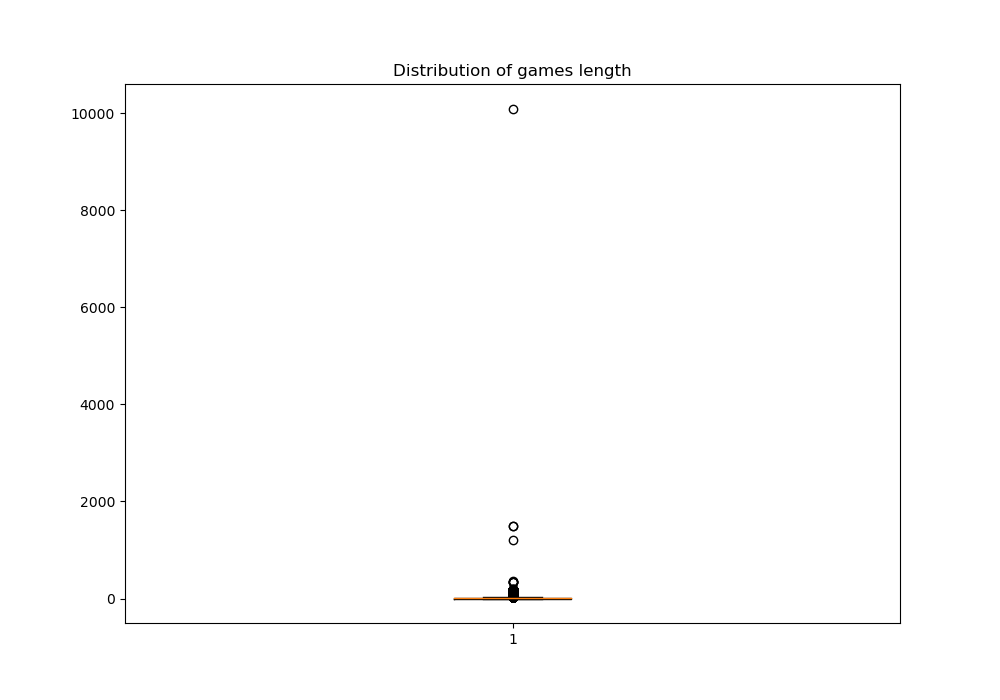

In [12]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(dataset['game_length'])
plt.title('Distribution of games length')
plt.show()

In [13]:
# Creo un atribut anomenat 'rating_dist' que serà la diferència de 'rating' dels dos jugadors
dataset['rating_dist'] = abs(dataset['white_rating'] - dataset['black_rating'])

<IPython.core.display.Javascript object>


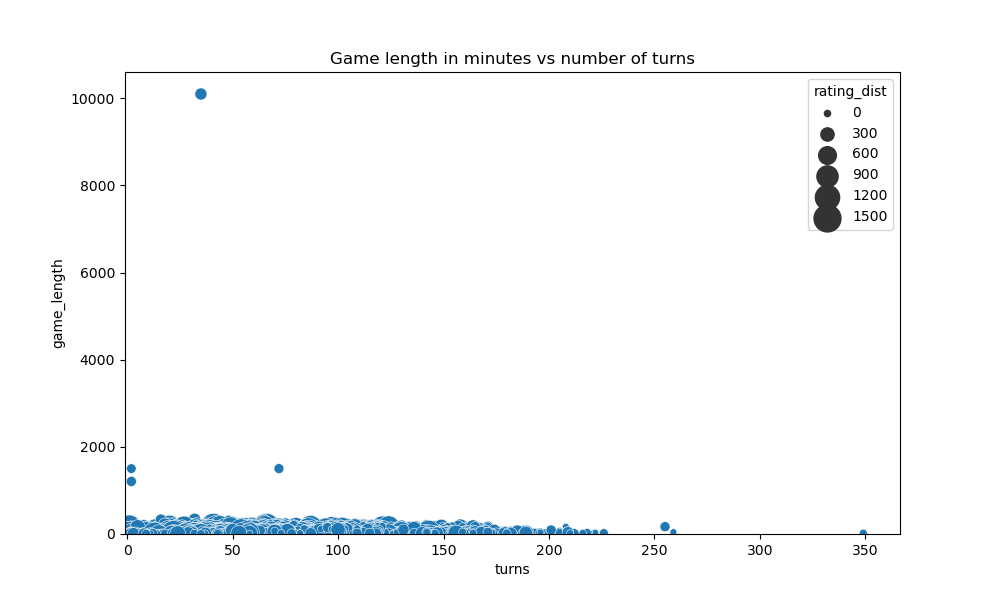

In [14]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns')
plt.xlim((-1))
plt.ylim((-1))

plt.show()

In [15]:
# Veiem clarament que hi ha un outlier

outlier = dataset[dataset["game_length"] > 10000]
outlier

id  rated        created_at      last_move_at  turns  \
10754  eyhzu8aj  False 1389882733749.000 1390488578450.000     35   

       victory_status_outoftime  victory_status_resign  victory_status_mate  \
10754                     0.000                  1.000                0.000   

       victory_status_draw winner  ...      black_id black_rating  \
10754                0.000  white  ...  miladghasemi         1011   

                                                   moves opening_eco  \
10754  d4 f6 Nf3 e5 e3 Nc6 Nc3 d5 Nb5 Qd7 Bd2 a6 Na3 ...         A40   

       opening_name opening_ply rated_bi game_length  victory_status  \
10754  Queen's Pawn           1        0   10097.410          resign   

       rating_dist  
10754          234  

[1 rows x 23 columns]

<IPython.core.display.Javascript object>


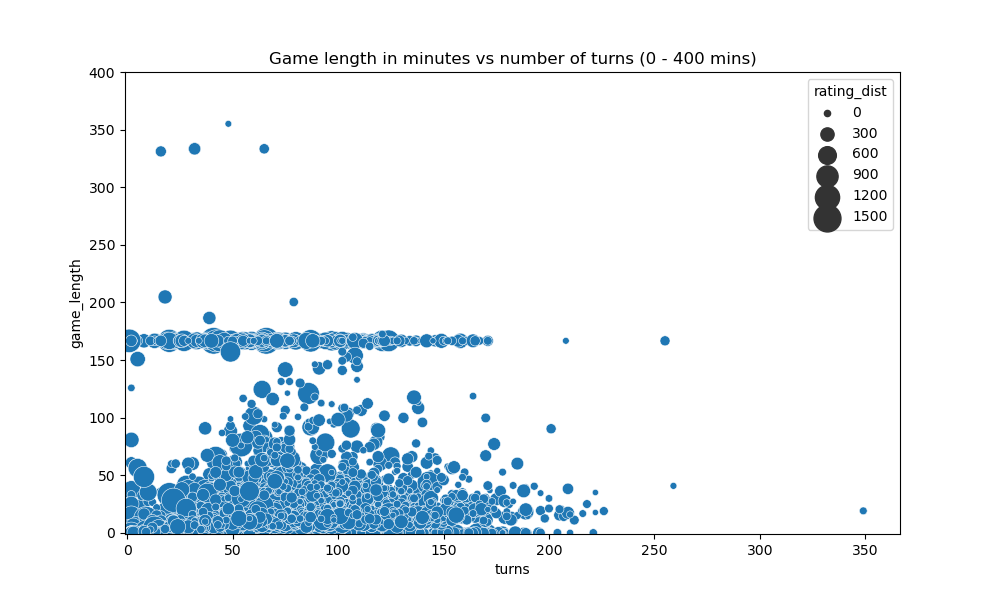

In [16]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (0 - 400 mins)')
plt.xlim((-1))
plt.ylim((-1, 400))

plt.show()

<IPython.core.display.Javascript object>


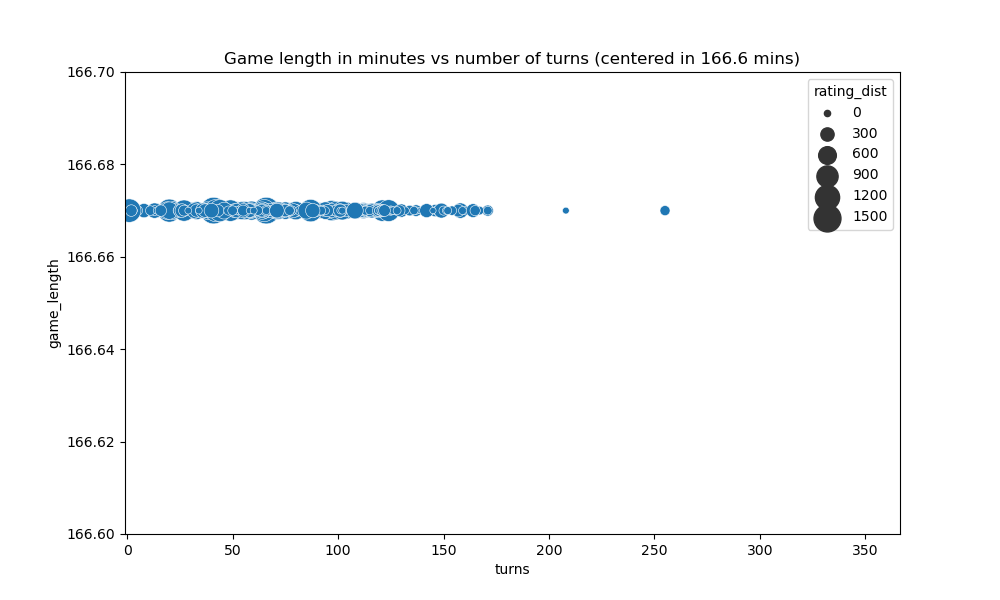

In [17]:
# Observem que hi ha una gran concentració de punts entre el game_length 150 i 200

plt.figure(figsize=(10,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (centered in 166.6 mins)')
plt.xlim((-1))
plt.ylim((166.6, 166.7))

plt.show()

<IPython.core.display.Javascript object>


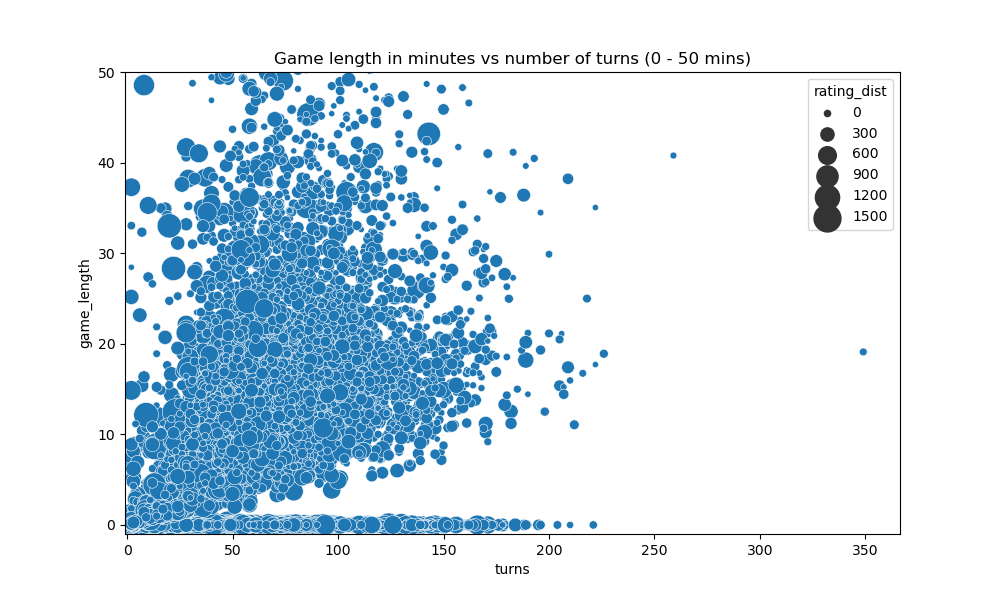

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (0 - 50 mins)')
plt.xlim((-1))
plt.ylim((-1, 50))

plt.show()

<IPython.core.display.Javascript object>


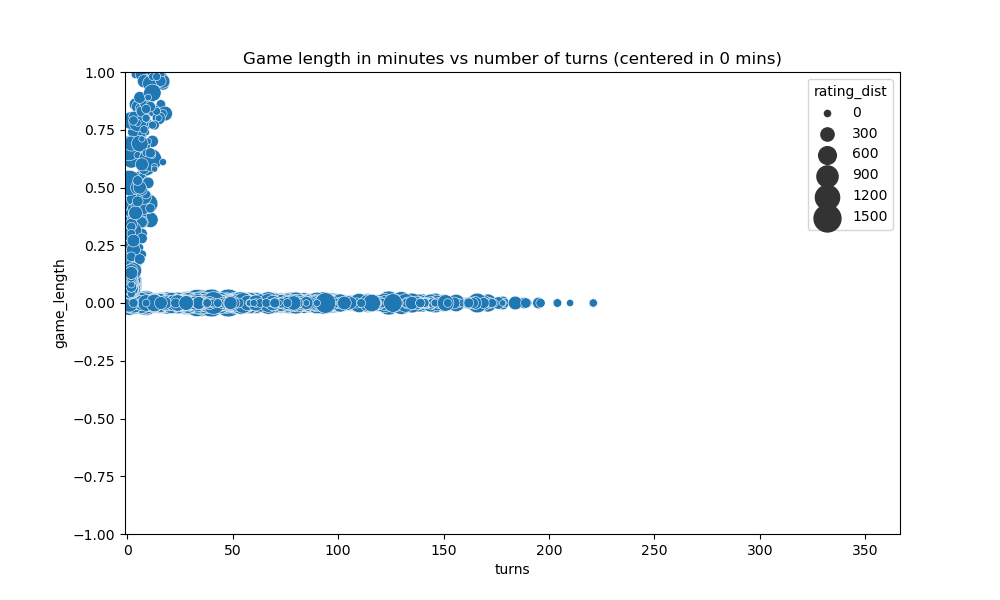

In [19]:
# També veiem que hi ha una gran concentració en game_length = 0

plt.figure(figsize=(10,6))

sns.scatterplot(data=dataset, x='turns', y='game_length', size='rating_dist', sizes=(20, 400))

plt.title('Game length in minutes vs number of turns (centered in 0 mins)')
plt.xlim((-1))
plt.ylim((-1, 1))

plt.show()

In [21]:
# Veient els diferents gràfics identifiquem dos punts on es concentra l'atribut 'game_length', són en el 166.67 i el 0.
# Mirem quantes mostres prensenten aquests síntomes

n1 = len(dataset[dataset["game_length"] == 166.67])
n2 = len(dataset[dataset["game_length"] == 0])

print("Hi ha", n1, "partides amb un temps de joc de 166.7 minuts.")
print("Hi ha", n2, "partides amb un temps de joc de 0 minuts.")

per = (n1 + n2)/llargada * 100

print("El", format(per, '.2f'), "% de les partides del dataset tenen un temps de joc de 0 o 166.7 minuts.")

Hi ha 734 partides amb un temps de joc de 166.7 minuts.
Hi ha 8548 partides amb un temps de joc de 0 minuts.
El 46.28 % de les partides del dataset tenen un temps de joc de 0 o 166.7 minuts.


In [22]:
# Un 46% de les partides amb aquest temps indica que hi ha hagut algun error, així que es desestimarà l'atribut 
# La desestimació d'aquest atribut es pot fer sense problemes ja que en tenim un altre ('turns') que també estima la 
# llargada de la partida

dataset = dataset.drop('game_length', axis=1)
dataset = dataset.drop('created_at', axis=1)
dataset = dataset.drop('last_move_at', axis=1)
dataset.head()

id  rated  turns  victory_status_outoftime  victory_status_resign  \
0  TZJHLljE  False     13                     1.000                  0.000   
1  l1NXvwaE   True     16                     0.000                  1.000   
2  mIICvQHh   True     61                     0.000                  0.000   
3  kWKvrqYL   True     61                     0.000                  0.000   
4  9tXo1AUZ   True     95                     0.000                  0.000   

   victory_status_mate  victory_status_draw winner increment_code  \
0                0.000                0.000  white           15+2   
1                0.000                0.000  black           5+10   
2                1.000                0.000  white           5+10   
3                1.000                0.000  white           20+0   
4                1.000                0.000  white           30+3   

        white_id  white_rating      black_id  black_rating  \
0       bourgris          1500          a-00          1191   
1           a-00          1322     skinnerua          1261   
2         ischia          1496          a-00          1500   
3  daniamurashov          1439  adivanov2009          1454   
4      nik221107          1523  adivanov2009          1469   

                                               moves opening_eco  \
0  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...         D10   
1  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
4  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...         C41   

                             opening_name  opening_ply  rated_bi  \
0        Slav Defense: Exchange Variation            5         0   
1  Nimzowitsch Defense: Kennedy Variation            4         1   
2   King's Pawn Game: Leonardis Variation            3         1   
3  Queen's Pawn Game: Zukertort Variation            3         1   
4                        Philidor Defense            5         1   

  victory_status  rating_dist  
0      outoftime          309  
1         resign           61  
2           mate            4  
3           mate           15  
4           mate           54

In [23]:
# Ara mirem si hi ha partides duplicades

duplicats = dataset[dataset['id'].duplicated()]

print("En el dataset hi ha", len(duplicats), "duplicats. Que representa un", format(len(duplicats)/llargada*100, '.2f'),"%.")

En el dataset hi ha 945 duplicats. Que representa un 4.71 %.


In [24]:
# Es comprova que tots els atributs de les partides amb el 'id' igual també siguin iguals

def igual(arr):
    np_arr = arr.to_numpy()
    return (np_arr[0] == np_arr).all()

duplicats_id = dataset[dataset['id'].duplicated(keep=False)]['id'].values

def comprovant():
    for ID in duplicats_id:
        dupli = dataset[dataset['id'] == ID]
        for col in dupli:
            if(~igual(dupli[col])):
                return False
    return True

comprovant()

True

In [25]:
# Veiem que tots són iguals, així que eliminem les còpies (només deixant el primer)

dataset_not_duplicated = dataset.drop_duplicates(subset = 'id', keep='first')

In [26]:
len(dataset) - len(dataset_not_duplicated)

945

In [27]:
dataset = dataset_not_duplicated

Seguim transformant atributs no numèrics en numèrics

In [28]:
# dividiré l'atribut de increment code en dues parts: la primera és el temps que té cada jugador i la segona és l'increment

play_time = []
increment = []

increment_code = np.array(dataset['increment_code'])

for code in increment_code:
    play_time.append(code.split('+')[0])
    increment.append(code.split('+')[1])

dataset['play_time'] = play_time
dataset['increment'] = increment

In [29]:
# Transformar l'atribut winner a numèric 
# 1 - guanya blanc
# 0 - guanya negre
# 0.5 - empat

winner_num = []

for el in dataset['winner']:
    if (el == 'white'):
        var = 1
    elif (el == 'black'):
        var = 0
    else:
        var = 0.5
    winner_num.append(var)
    
dataset['winner_num'] = winner_num
dataset.head()

id  rated  turns  victory_status_outoftime  victory_status_resign  \
0  TZJHLljE  False     13                     1.000                  0.000   
1  l1NXvwaE   True     16                     0.000                  1.000   
2  mIICvQHh   True     61                     0.000                  0.000   
3  kWKvrqYL   True     61                     0.000                  0.000   
4  9tXo1AUZ   True     95                     0.000                  0.000   

   victory_status_mate  victory_status_draw winner increment_code  \
0                0.000                0.000  white           15+2   
1                0.000                0.000  black           5+10   
2                1.000                0.000  white           5+10   
3                1.000                0.000  white           20+0   
4                1.000                0.000  white           30+3   

        white_id  ...                                              moves  \
0       bourgris  ...  d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...   
1           a-00  ...  d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...   
2         ischia  ...  e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...   
3  daniamurashov  ...  d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...   
4      nik221107  ...  e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...   

  opening_eco                            opening_name opening_ply rated_bi  \
0         D10        Slav Defense: Exchange Variation           5        0   
1         B00  Nimzowitsch Defense: Kennedy Variation           4        1   
2         C20   King's Pawn Game: Leonardis Variation           3        1   
3         D02  Queen's Pawn Game: Zukertort Variation           3        1   
4         C41                        Philidor Defense           5        1   

  victory_status  rating_dist  play_time increment  winner_num  
0      outoftime          309         15         2       1.000  
1         resign           61          5        10       0.000  
2           mate            4          5        10       1.000  
3           mate           15         20         0       1.000  
4           mate           54         30         3       1.000  

[5 rows x 23 columns]

In [30]:
# Passar l'atribut 'opening_name' i 'opening_eco' a numèric
# Per cada 'opening', crear número sumant:
#     1 per cada partida guanyada pel jugador blanc
#     0 per cada partida guanyada pel jugador negre
#     0.5 per cada partida empatada

def nou_atr_num(atr, convert_to):
    atr_unique = set(np.array(dataset[atr]))

    dicc_opn = {}

    for op in atr_unique:
        dicc_opn[op] = dataset[dataset[atr] == op]['winner_num'].mean()

    atr_num = []

    for op in dataset[atr]:
        atr_num.append(dicc_opn[op])

    dataset[convert_to] = atr_num

In [31]:
nou_atr_num('opening_name', 'opening_name_num')
nou_atr_num('opening_eco', 'opening_eco_num')
    
dataset.head()

id  rated  turns  victory_status_outoftime  victory_status_resign  \
0  TZJHLljE  False     13                     1.000                  0.000   
1  l1NXvwaE   True     16                     0.000                  1.000   
2  mIICvQHh   True     61                     0.000                  0.000   
3  kWKvrqYL   True     61                     0.000                  0.000   
4  9tXo1AUZ   True     95                     0.000                  0.000   

   victory_status_mate  victory_status_draw winner increment_code  \
0                0.000                0.000  white           15+2   
1                0.000                0.000  black           5+10   
2                1.000                0.000  white           5+10   
3                1.000                0.000  white           20+0   
4                1.000                0.000  white           30+3   

        white_id  ...                            opening_name opening_ply  \
0       bourgris  ...        Slav Defense: Exchange Variation           5   
1           a-00  ...  Nimzowitsch Defense: Kennedy Variation           4   
2         ischia  ...   King's Pawn Game: Leonardis Variation           3   
3  daniamurashov  ...  Queen's Pawn Game: Zukertort Variation           3   
4      nik221107  ...                        Philidor Defense           5   

   rated_bi victory_status rating_dist play_time  increment  winner_num  \
0         0      outoftime         309        15          2       1.000   
1         1         resign          61         5         10       0.000   
2         1           mate           4         5         10       1.000   
3         1           mate          15        20          0       1.000   
4         1           mate          54        30          3       1.000   

  opening_name_num  opening_eco_num  
0            0.368            0.453  
1            0.600            0.620  
2            0.465            0.467  
3            0.572            0.534  
4            0.645            0.596  

[5 rows x 25 columns]

### Analitzem el dataset ###

Visualitzem les dades.

<IPython.core.display.Javascript object>


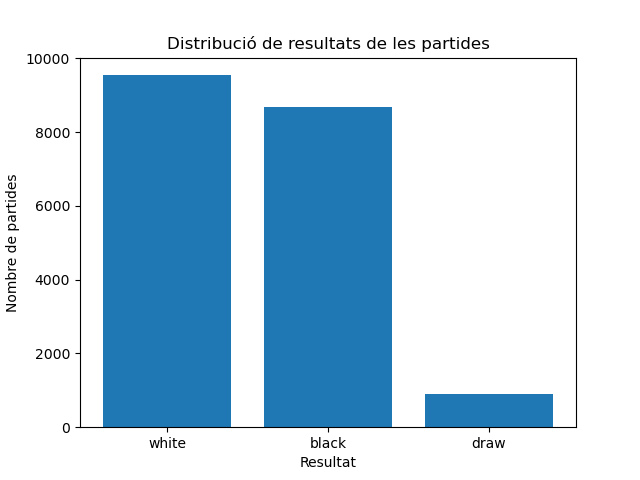

<IPython.core.display.Javascript object>


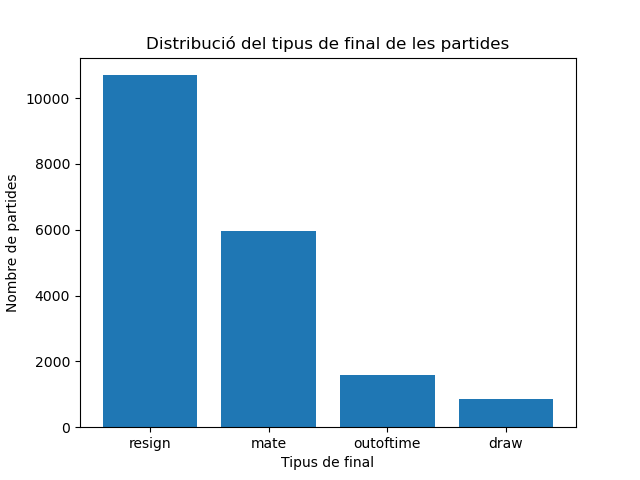

In [32]:
plt.figure()
plt.bar(['white', 'black', 'draw'], dataset['winner'].value_counts())
plt.title("Distribució de resultats de les partides")
plt.xlabel("Resultat")
plt.ylabel("Nombre de partides")

plt.figure()
plt.bar(['resign', 'mate', 'outoftime', 'draw'], dataset['victory_status'].value_counts())
plt.title("Distribució del tipus de final de les partides")
plt.xlabel("Tipus de final")
plt.ylabel("Nombre de partides")

plt.show()

<IPython.core.display.Javascript object>


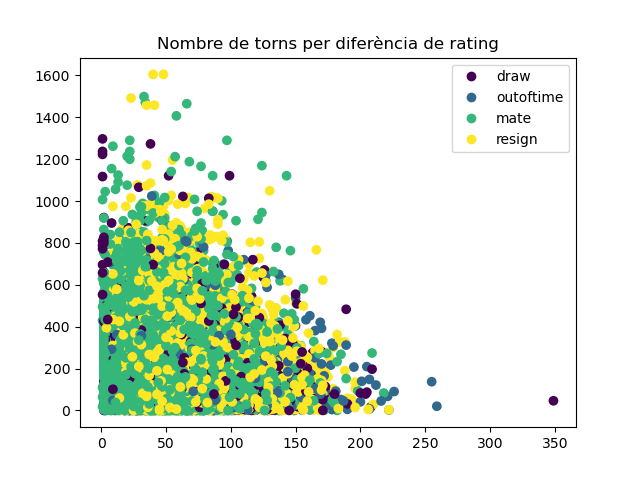

In [33]:
vs = []
for el in dataset.victory_status.values:
    if el == 'outoftime':
        vs.append(1)
    elif el == 'draw':
        vs.append(2)
    elif el == 'resign':
        vs.append(3)
    else:
        vs.append(4)

plt.figure()
scatter = plt.scatter(data=dataset, x='turns', y='rating_dist',c=vs)
plt.legend(handles=scatter.legend_elements()[0], labels=['draw', 'outoftime', 'mate', 'resign'])

plt.title("Nombre de torns per diferència de rating")
plt.show()

In [34]:
opening_eco = dataset['opening_eco']
opening_eco_unique = set(opening_eco)

# Creació d'un diccionari amb els diferents openings (unics) distinguits per la lletra (A, B, C, D, E)
# Dins del diccionari hi ha cada opening amb els guanyadors que ha causat

dicc_op = {
    'A': {},
    'B': {},
    'C': {},
    'D': {},
    'E': {},
}

for op_eco in opening_eco_unique:
    dicc_op[op_eco[0]][op_eco] = np.array(dataset[dataset['opening_eco'] == op_eco]['winner'])
    
dicc_op

{'A': {'A73': array(['black'], dtype=object),
  'A13': array(['white', 'white', 'draw', 'white', 'white', 'black', 'black',
         'white', 'white', 'black', 'white', 'white', 'draw', 'white',
         'white', 'white', 'black', 'black', 'white', 'white', 'white',
         'black', 'white', 'white', 'white', 'white', 'white', 'white',
         'black', 'draw', 'black', 'white', 'white', 'white', 'white',
         'black', 'white', 'white', 'black', 'white', 'white', 'white',
         'white', 'white', 'white', 'white', 'white', 'white', 'white'],
        dtype=object),
  'A43': array(['white', 'white', 'black', 'black', 'white', 'white', 'black',
         'black', 'white', 'white', 'draw', 'white', 'white', 'black',
         'black', 'white', 'black', 'draw', 'white', 'black', 'white',
         'black', 'white', 'black', 'white', 'white', 'black', 'black',
         'black', 'black', 'black', 'white', 'draw', 'black', 'white',
         'white', 'black', 'white', 'white', 'black', 'whi

In [35]:
def count(arr, query):
    sum = 0
    for el in arr:
        if (el == query):
            sum += 1
    return sum

<IPython.core.display.Javascript object>


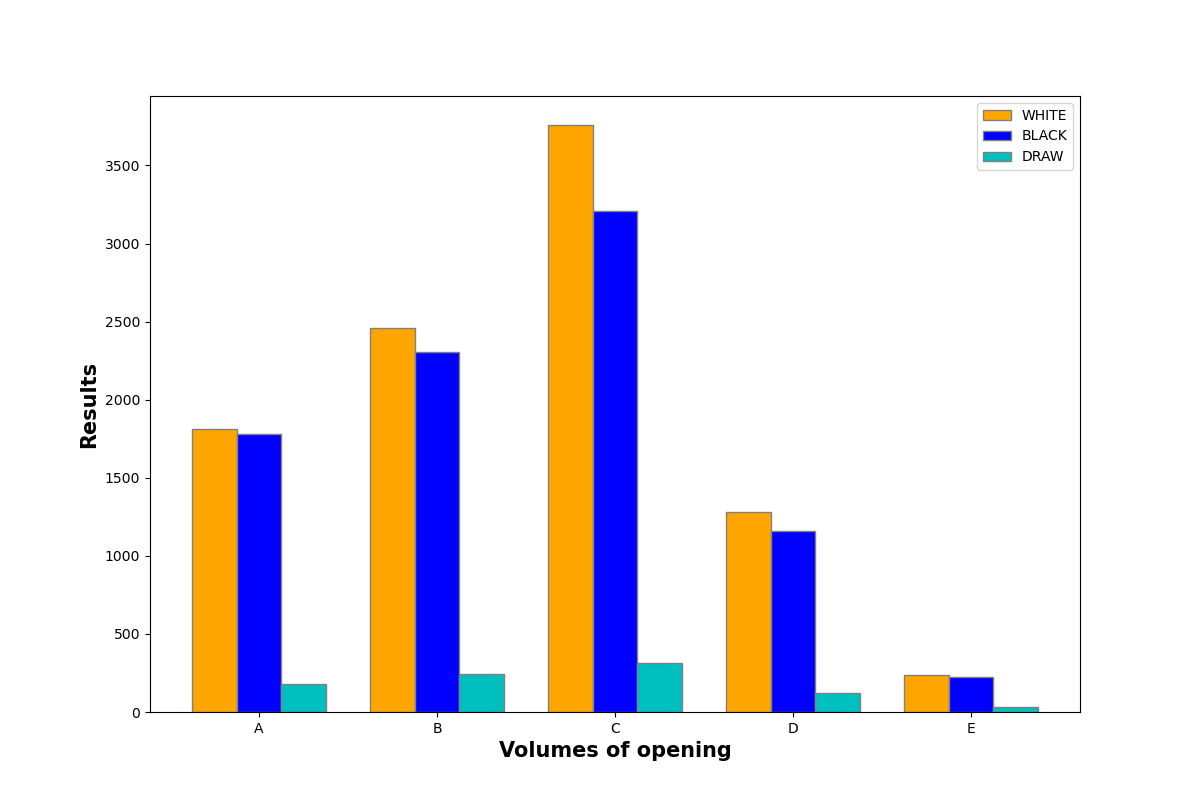

In [36]:
w = []
b = []
d = []
t = []

for op in dicc_op.keys():
    
    white = 0
    black = 0
    draws = 0
    
    for el in dicc_op[op].keys():
        white += count(dicc_op[op][el], 'white')
        black += count(dicc_op[op][el], 'black')
        draws += count(dicc_op[op][el], 'draw')
        
    w.append(white)
    b.append(black)
    d.append(draws)
    t.append(white + black + draws)
        
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(w))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, w, color ='orange', width = barWidth,
        edgecolor ='grey', label ='WHITE')
plt.bar(br2, b, color ='b', width = barWidth,
        edgecolor ='grey', label ='BLACK')
plt.bar(br3, d, color ='c', width = barWidth,
        edgecolor ='grey', label ='DRAW')

plt.xlabel('Volumes of opening', fontweight ='bold', fontsize = 15)
plt.ylabel('Results', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(w))],
        ['A', 'B', 'C', 'D', 'E'])
 
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


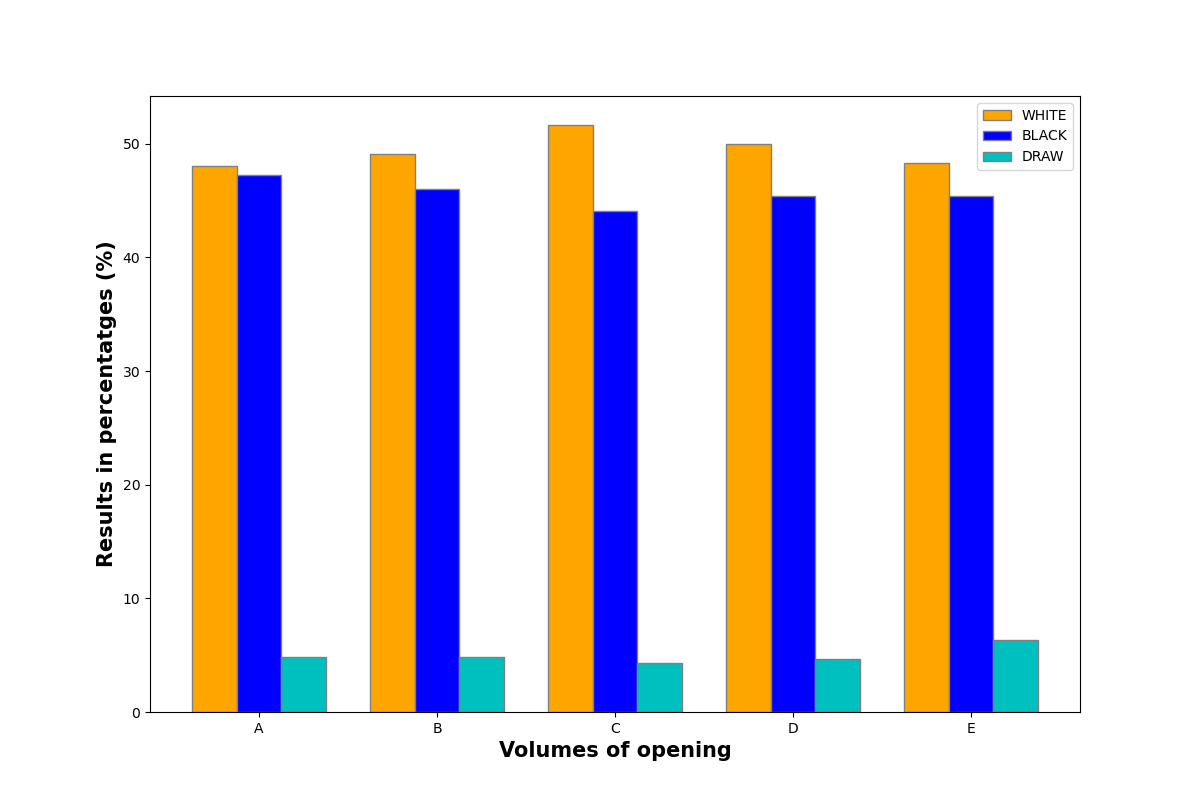

In [37]:
wp = []
bp = []
dp = []
    
for i in range(5):
    wp.append(w[i]/t[i]*100)
    bp.append(b[i]/t[i]*100)
    dp.append(d[i]/t[i]*100)
    

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(w))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, wp, color ='orange', width = barWidth,
        edgecolor ='grey', label ='WHITE')
plt.bar(br2, bp, color ='b', width = barWidth,
        edgecolor ='grey', label ='BLACK')
plt.bar(br3, dp, color ='c', width = barWidth,
        edgecolor ='grey', label ='DRAW')

plt.xlabel('Volumes of opening', fontweight ='bold', fontsize = 15)
plt.ylabel('Results in percentatges (%)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(w))],
        ['A', 'B', 'C', 'D', 'E'])
 
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


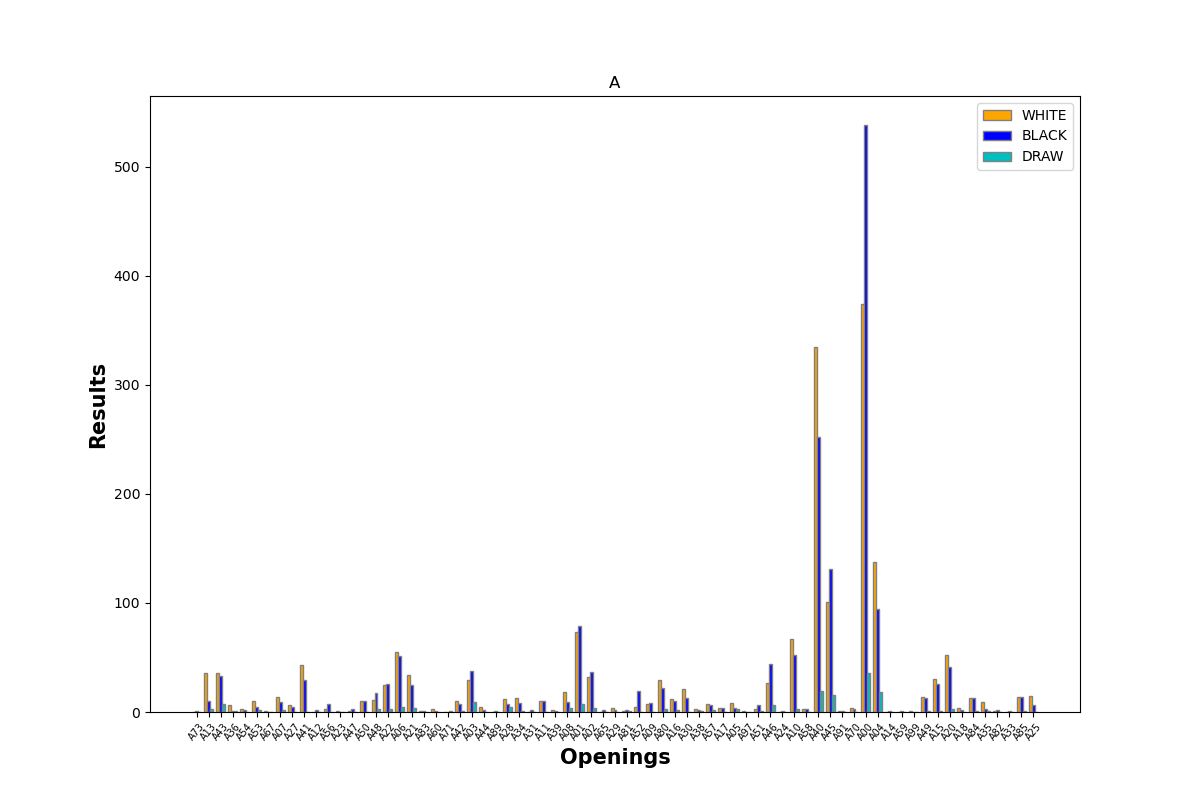

<IPython.core.display.Javascript object>


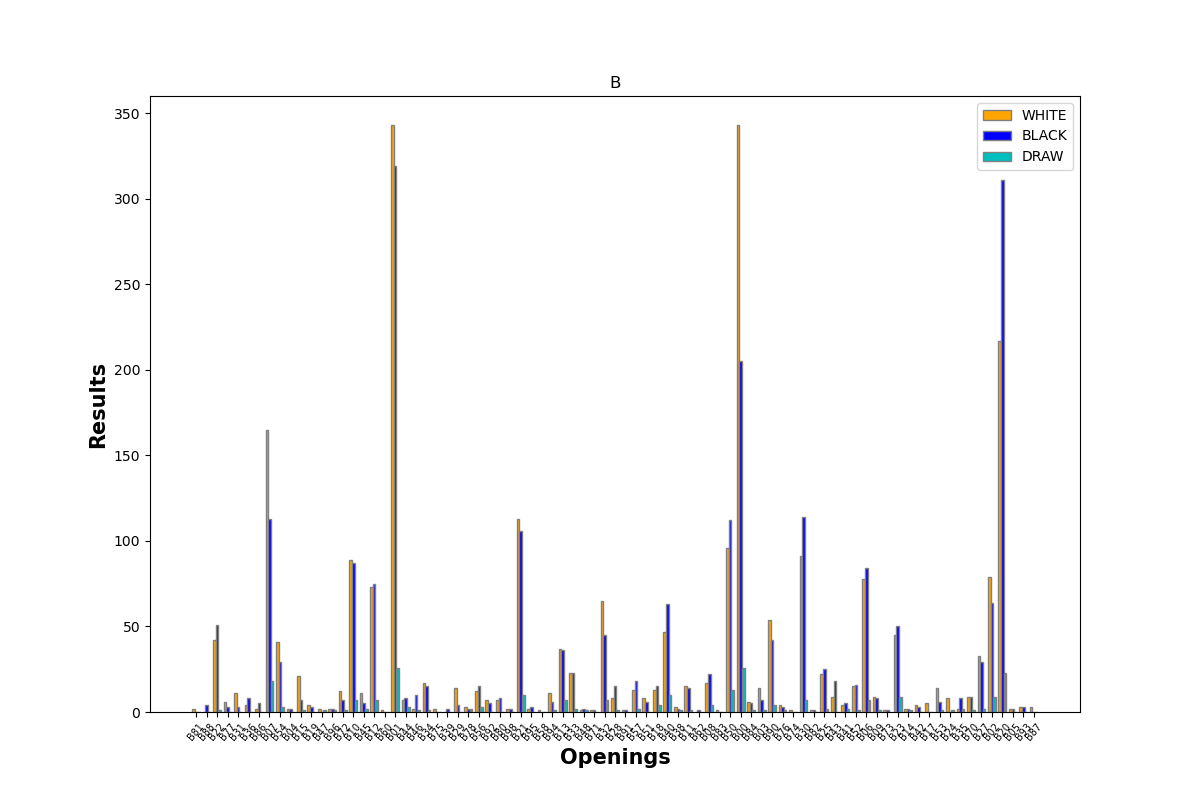

<IPython.core.display.Javascript object>


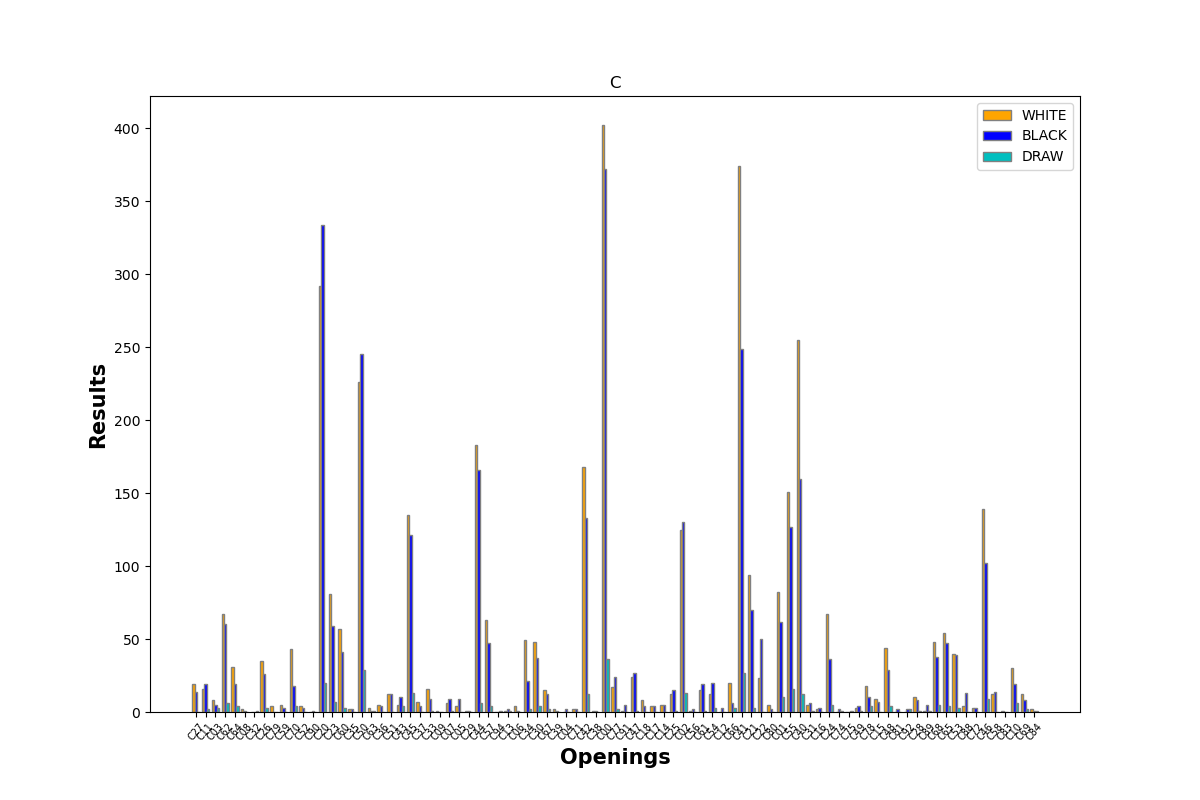

<IPython.core.display.Javascript object>


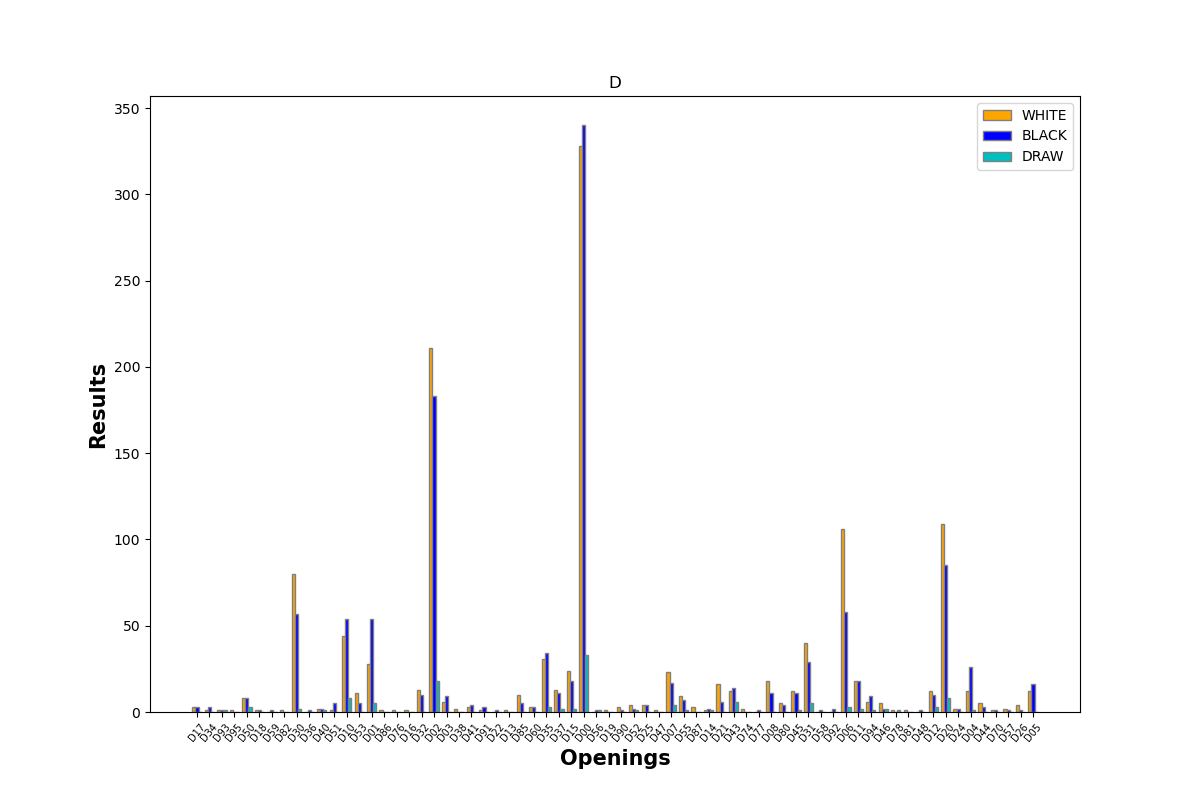

<IPython.core.display.Javascript object>


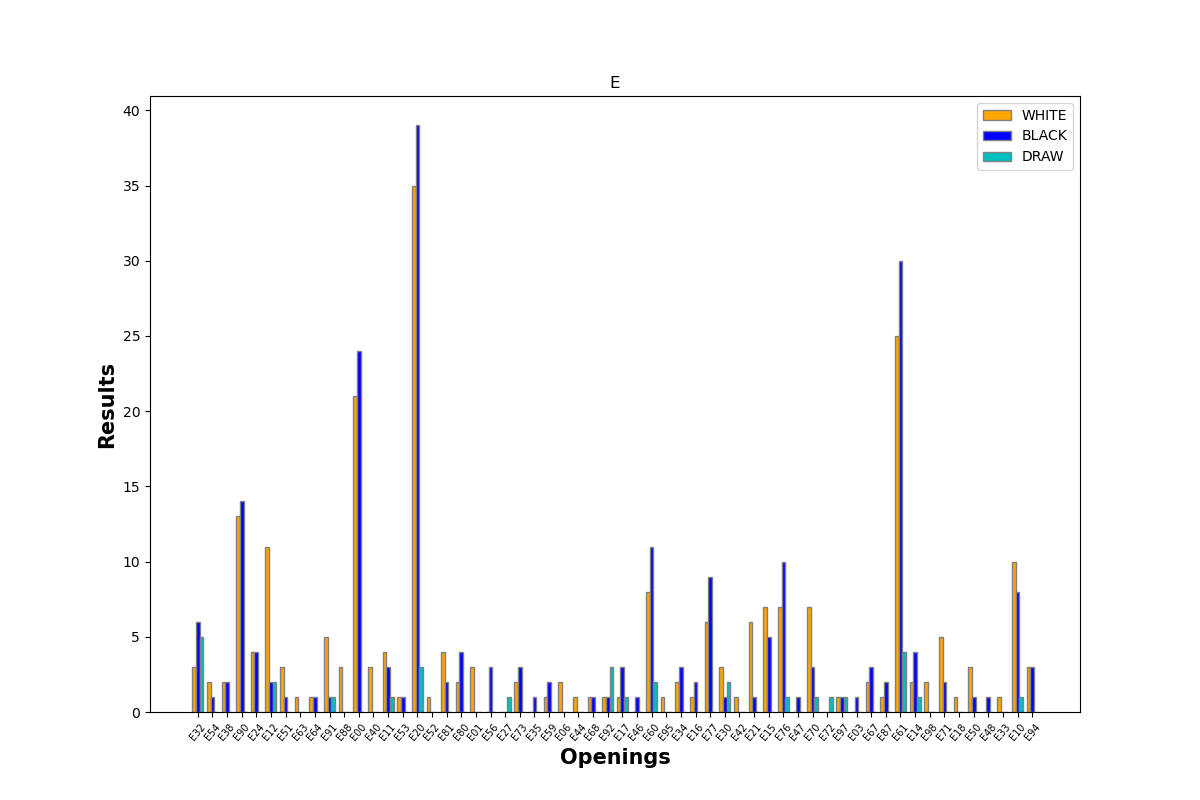

In [38]:
for vol in dicc_op:
    w = []
    b = []
    d = []
    
    fig = plt.subplots(figsize =(12, 8))
    
    barWidth = 0.25
    
    for op in dicc_op[vol]:
        w.append(count(dicc_op[vol][op], 'white'))
        b.append(count(dicc_op[vol][op], 'black'))
        d.append(count(dicc_op[vol][op], 'draw'))
    
    br1 = np.arange(len(w))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    plt.bar(br1, w, color ='orange', width = barWidth,
            edgecolor ='grey', label ='WHITE')
    plt.bar(br2, b, color ='b', width = barWidth,
            edgecolor ='grey', label ='BLACK')
    plt.bar(br3, d, color ='c', width = barWidth,
            edgecolor ='grey', label ='DRAW')

    plt.xlabel('Openings', fontweight ='bold', fontsize = 15)
    plt.ylabel('Results', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(w))],
            dicc_op[vol].keys())
    plt.xticks(rotation=50, fontsize=7)
    
    plt.title(vol)

    plt.legend()
plt.show()
    

<IPython.core.display.Javascript object>


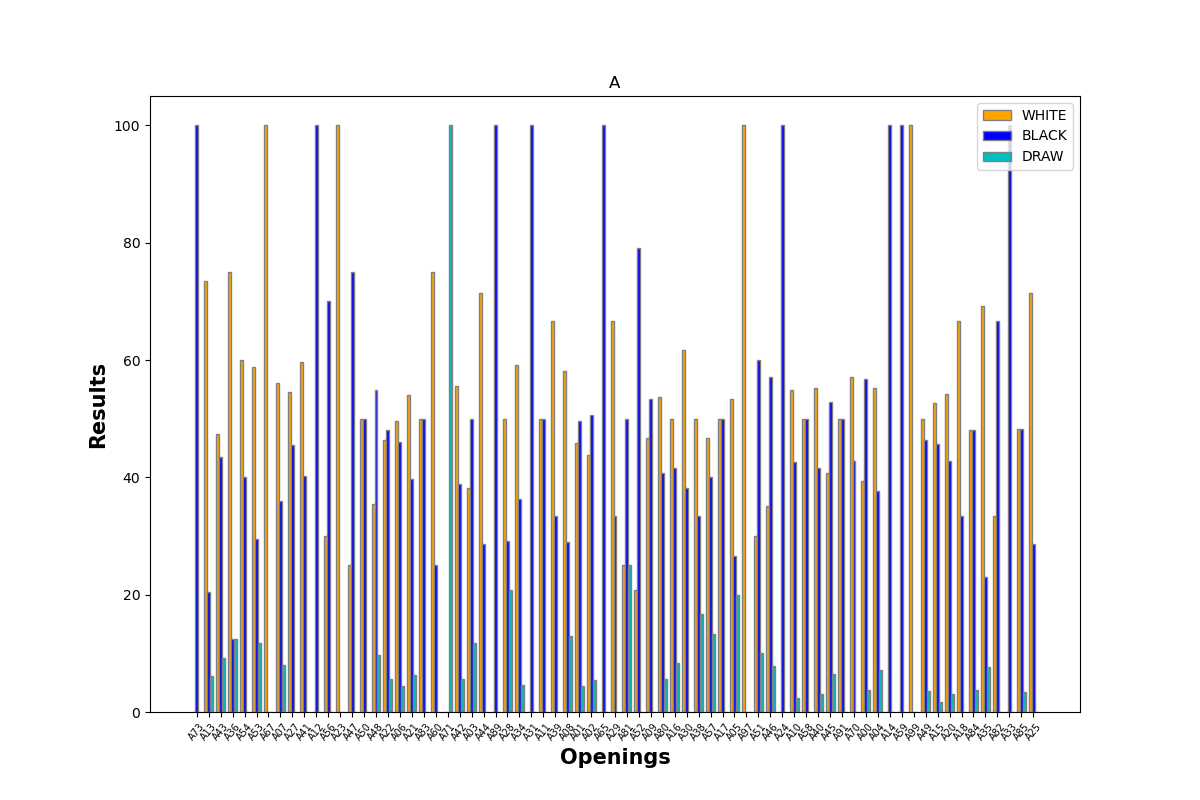

<IPython.core.display.Javascript object>


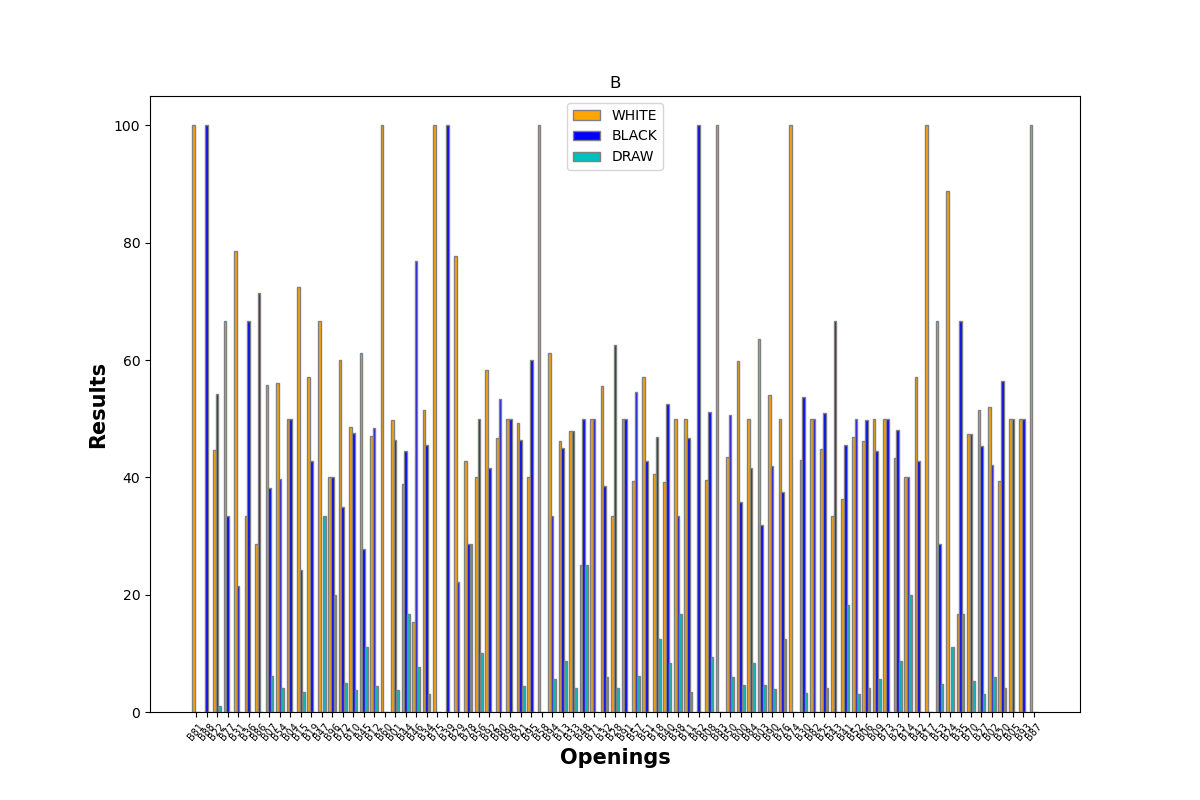

<IPython.core.display.Javascript object>


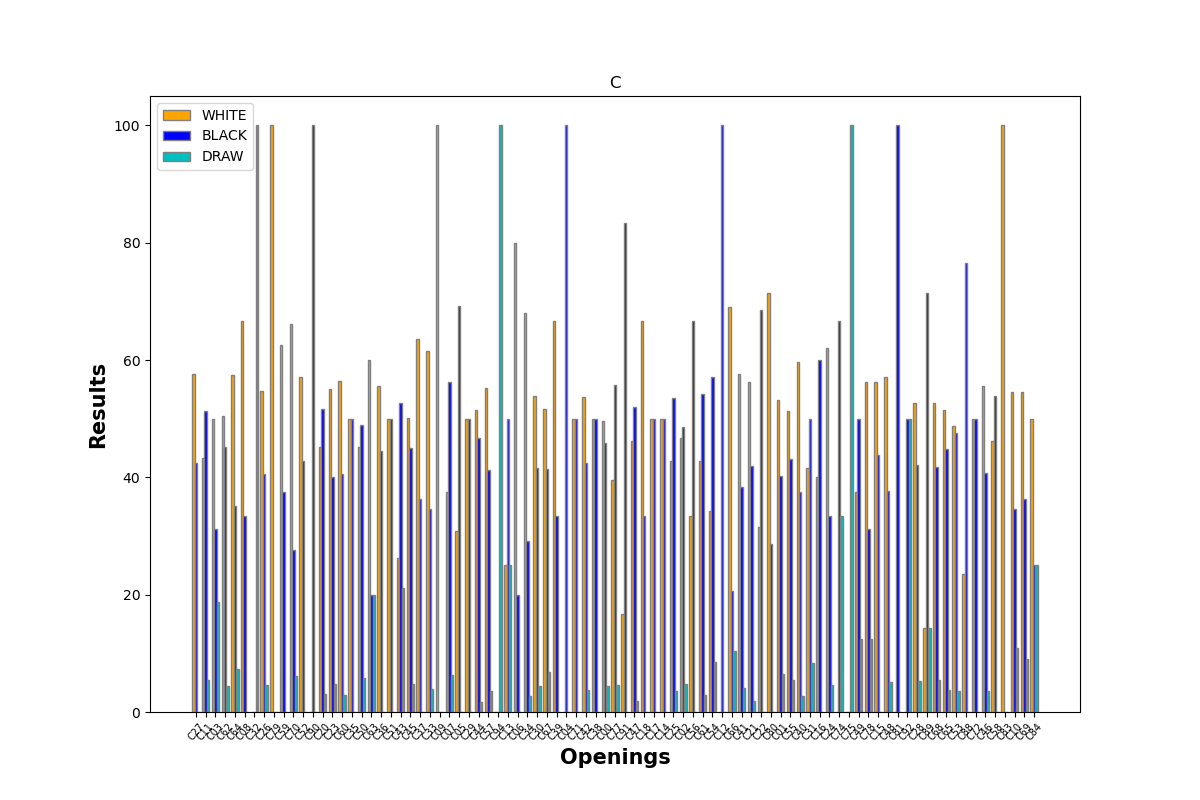

<IPython.core.display.Javascript object>


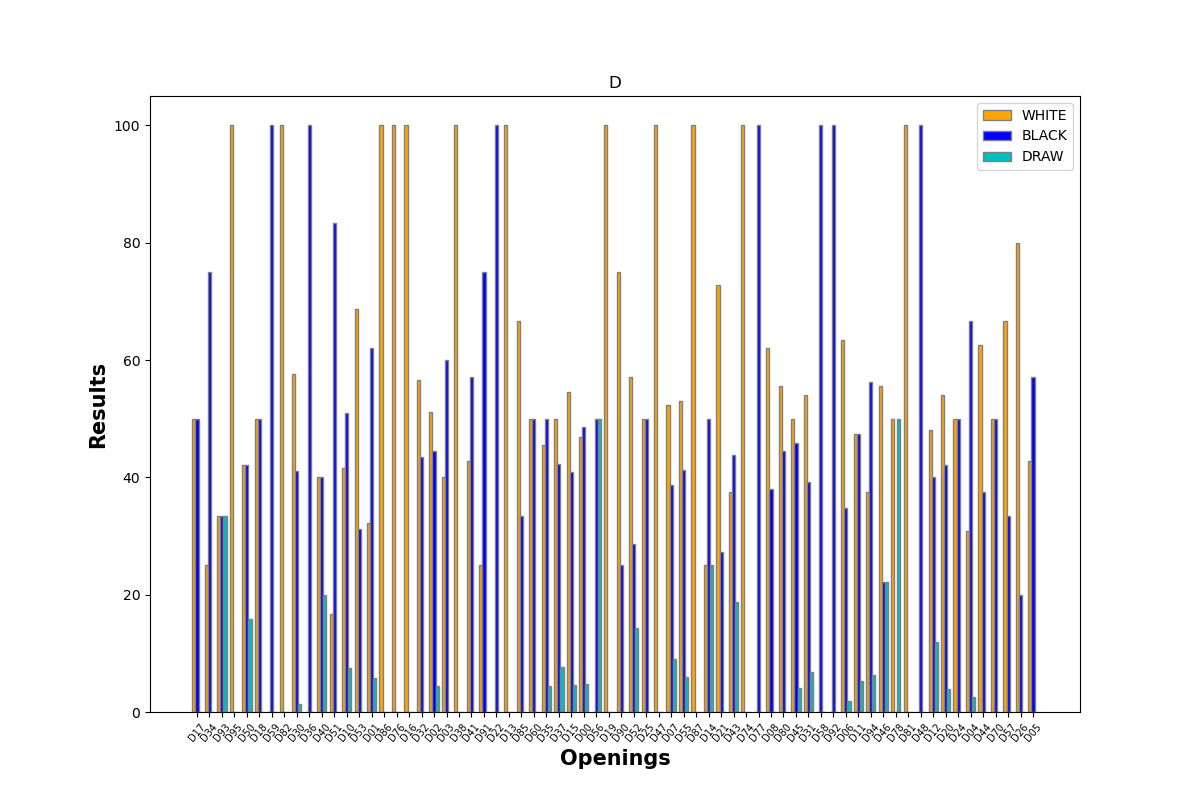

C:\Users\uanra\AppData\Local\Temp\ipykernel_10276\2131754388.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize =(12, 8))


<IPython.core.display.Javascript object>


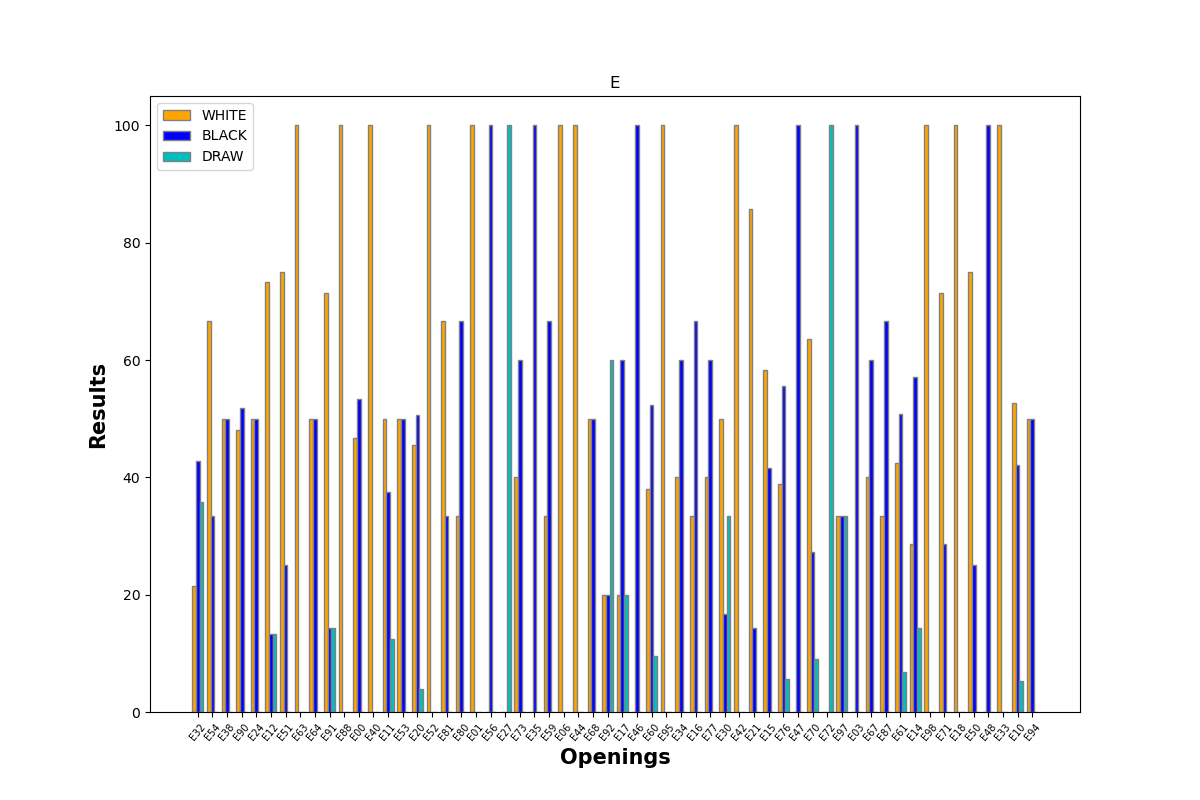

In [39]:
# Ara ho farem amb els percentatges per comprovar els resultats en igualtat de condicions

for vol in dicc_op:
    w = []
    b = []
    d = []
    
    fig = plt.subplots(figsize =(12, 8))
    
    barWidth = 0.25
    
    for op in dicc_op[vol]:
        l = len(dicc_op[vol][op])
        w.append(count(dicc_op[vol][op], 'white')/l*100)
        b.append(count(dicc_op[vol][op], 'black')/l*100)
        d.append(count(dicc_op[vol][op], 'draw')/l*100)
    
    br1 = np.arange(len(w))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    plt.bar(br1, w, color ='orange', width = barWidth,
            edgecolor ='grey', label ='WHITE')
    plt.bar(br2, b, color ='b', width = barWidth,
            edgecolor ='grey', label ='BLACK')
    plt.bar(br3, d, color ='c', width = barWidth,
            edgecolor ='grey', label ='DRAW')

    plt.xlabel('Openings', fontweight ='bold', fontsize = 15)
    plt.ylabel('Results', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(w))],
            dicc_op[vol].keys())
    plt.xticks(rotation=50, fontsize=7)
    
    plt.title(vol)

    plt.legend()
plt.show()
    

* A00 + BLACK
* A40 + WHITE
* B01 =
* B20 + BLACK
* B00 + WHITE +
* C00 = 
* C41 + WHITE
* D00 =

Openings are divided in five volumes labeled from "A" to "E"

In [40]:
dataset['winner_n'] = dataset['winner'].apply(lambda x: 1 if x=='white' else (0 if x=='black' else 2))

In [41]:
dataset.head()

id  rated  turns  victory_status_outoftime  victory_status_resign  \
0  TZJHLljE  False     13                     1.000                  0.000   
1  l1NXvwaE   True     16                     0.000                  1.000   
2  mIICvQHh   True     61                     0.000                  0.000   
3  kWKvrqYL   True     61                     0.000                  0.000   
4  9tXo1AUZ   True     95                     0.000                  0.000   

   victory_status_mate  victory_status_draw winner increment_code  \
0                0.000                0.000  white           15+2   
1                0.000                0.000  black           5+10   
2                1.000                0.000  white           5+10   
3                1.000                0.000  white           20+0   
4                1.000                0.000  white           30+3   

        white_id  ...  opening_ply rated_bi  victory_status rating_dist  \
0       bourgris  ...            5        0       outoftime         309   
1           a-00  ...            4        1          resign          61   
2         ischia  ...            3        1            mate           4   
3  daniamurashov  ...            3        1            mate          15   
4      nik221107  ...            5        1            mate          54   

  play_time increment  winner_num  opening_name_num opening_eco_num  winner_n  
0        15         2       1.000             0.368           0.453         1  
1         5        10       0.000             0.600           0.620         0  
2         5        10       1.000             0.465           0.467         1  
3        20         0       1.000             0.572           0.534         1  
4        30         3       1.000             0.645           0.596         1  

[5 rows x 26 columns]

In [42]:
# Treure els següents atributs ja que no tenen impacte en el joc o perquè ja s'ha convertit en un altre atribut (conversió
# a numèric)

dataset = dataset.drop('id', axis=1)
dataset = dataset.drop('rated', axis=1)
dataset = dataset.drop('increment_code', axis=1)
dataset = dataset.drop('white_id', axis=1)
dataset = dataset.drop('white_rating', axis=1) 
dataset = dataset.drop('black_id', axis=1)
dataset = dataset.drop('black_rating', axis=1) 
dataset = dataset.drop('moves', axis=1)
dataset = dataset.drop('opening_eco', axis=1)
dataset = dataset.drop('opening_name', axis=1)
dataset = dataset.drop('winner', axis=1)
dataset = dataset.drop('winner_num', axis=1)
dataset = dataset.drop('victory_status', axis=1)

dataset.head()

turns  victory_status_outoftime  victory_status_resign  \
0     13                     1.000                  0.000   
1     16                     0.000                  1.000   
2     61                     0.000                  0.000   
3     61                     0.000                  0.000   
4     95                     0.000                  0.000   

   victory_status_mate  victory_status_draw  opening_ply  rated_bi  \
0                0.000                0.000            5         0   
1                0.000                0.000            4         1   
2                1.000                0.000            3         1   
3                1.000                0.000            3         1   
4                1.000                0.000            5         1   

   rating_dist play_time increment  opening_name_num  opening_eco_num  \
0          309        15         2             0.368            0.453   
1           61         5        10             0.600            0.620   
2            4         5        10             0.465            0.467   
3           15        20         0             0.572            0.534   
4           54        30         3             0.645            0.596   

   winner_n  
0         1  
1         0  
2         1  
3         1  
4         1

In [43]:
# Let's scale the data (only those attributes which aren't categorical)

atr_to_scale = ['turns', 'opening_ply', 'rating_dist', 'play_time', 'increment']

scaler = StandardScaler()

dataset[atr_to_scale] = scaler.fit_transform(dataset[atr_to_scale])

dataset.head()

turns  victory_status_outoftime  victory_status_resign  \
0 -1.419                     1.000                  0.000   
1 -1.329                     0.000                  1.000   
2  0.015                     0.000                  0.000   
3  0.015                     0.000                  0.000   
4  1.030                     0.000                  0.000   

   victory_status_mate  victory_status_draw  opening_ply  rated_bi  \
0                0.000                0.000        0.066         0   
1                0.000                0.000       -0.292         1   
2                1.000                0.000       -0.649         1   
3                1.000                0.000       -0.649         1   
4                1.000                0.000        0.066         1   

   rating_dist  play_time  increment  opening_name_num  opening_eco_num  \
0        0.769      0.071     -0.228             0.368            0.453   
1       -0.627     -0.515      0.351             0.600            0.620   
2       -0.947     -0.515      0.351             0.465            0.467   
3       -0.885      0.364     -0.373             0.572            0.534   
4       -0.666      0.950     -0.155             0.645            0.596   

   winner_n  
0         1  
1         0  
2         1  
3         1  
4         1

Preprocessing acabat. Ha quedat un dataset de 13 atributs numèrics.

L'atribut objectiu és 'winner_n', que diu si el resultat de la partida ha sigut un empat (0.5), vicòria del jugador blanc (1) o victòria del jugador negre (0)

In [44]:
# Correlations

<IPython.core.display.Javascript object>


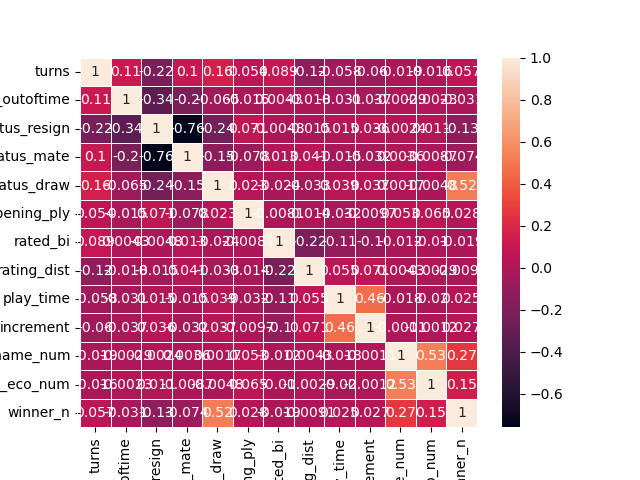

In [45]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


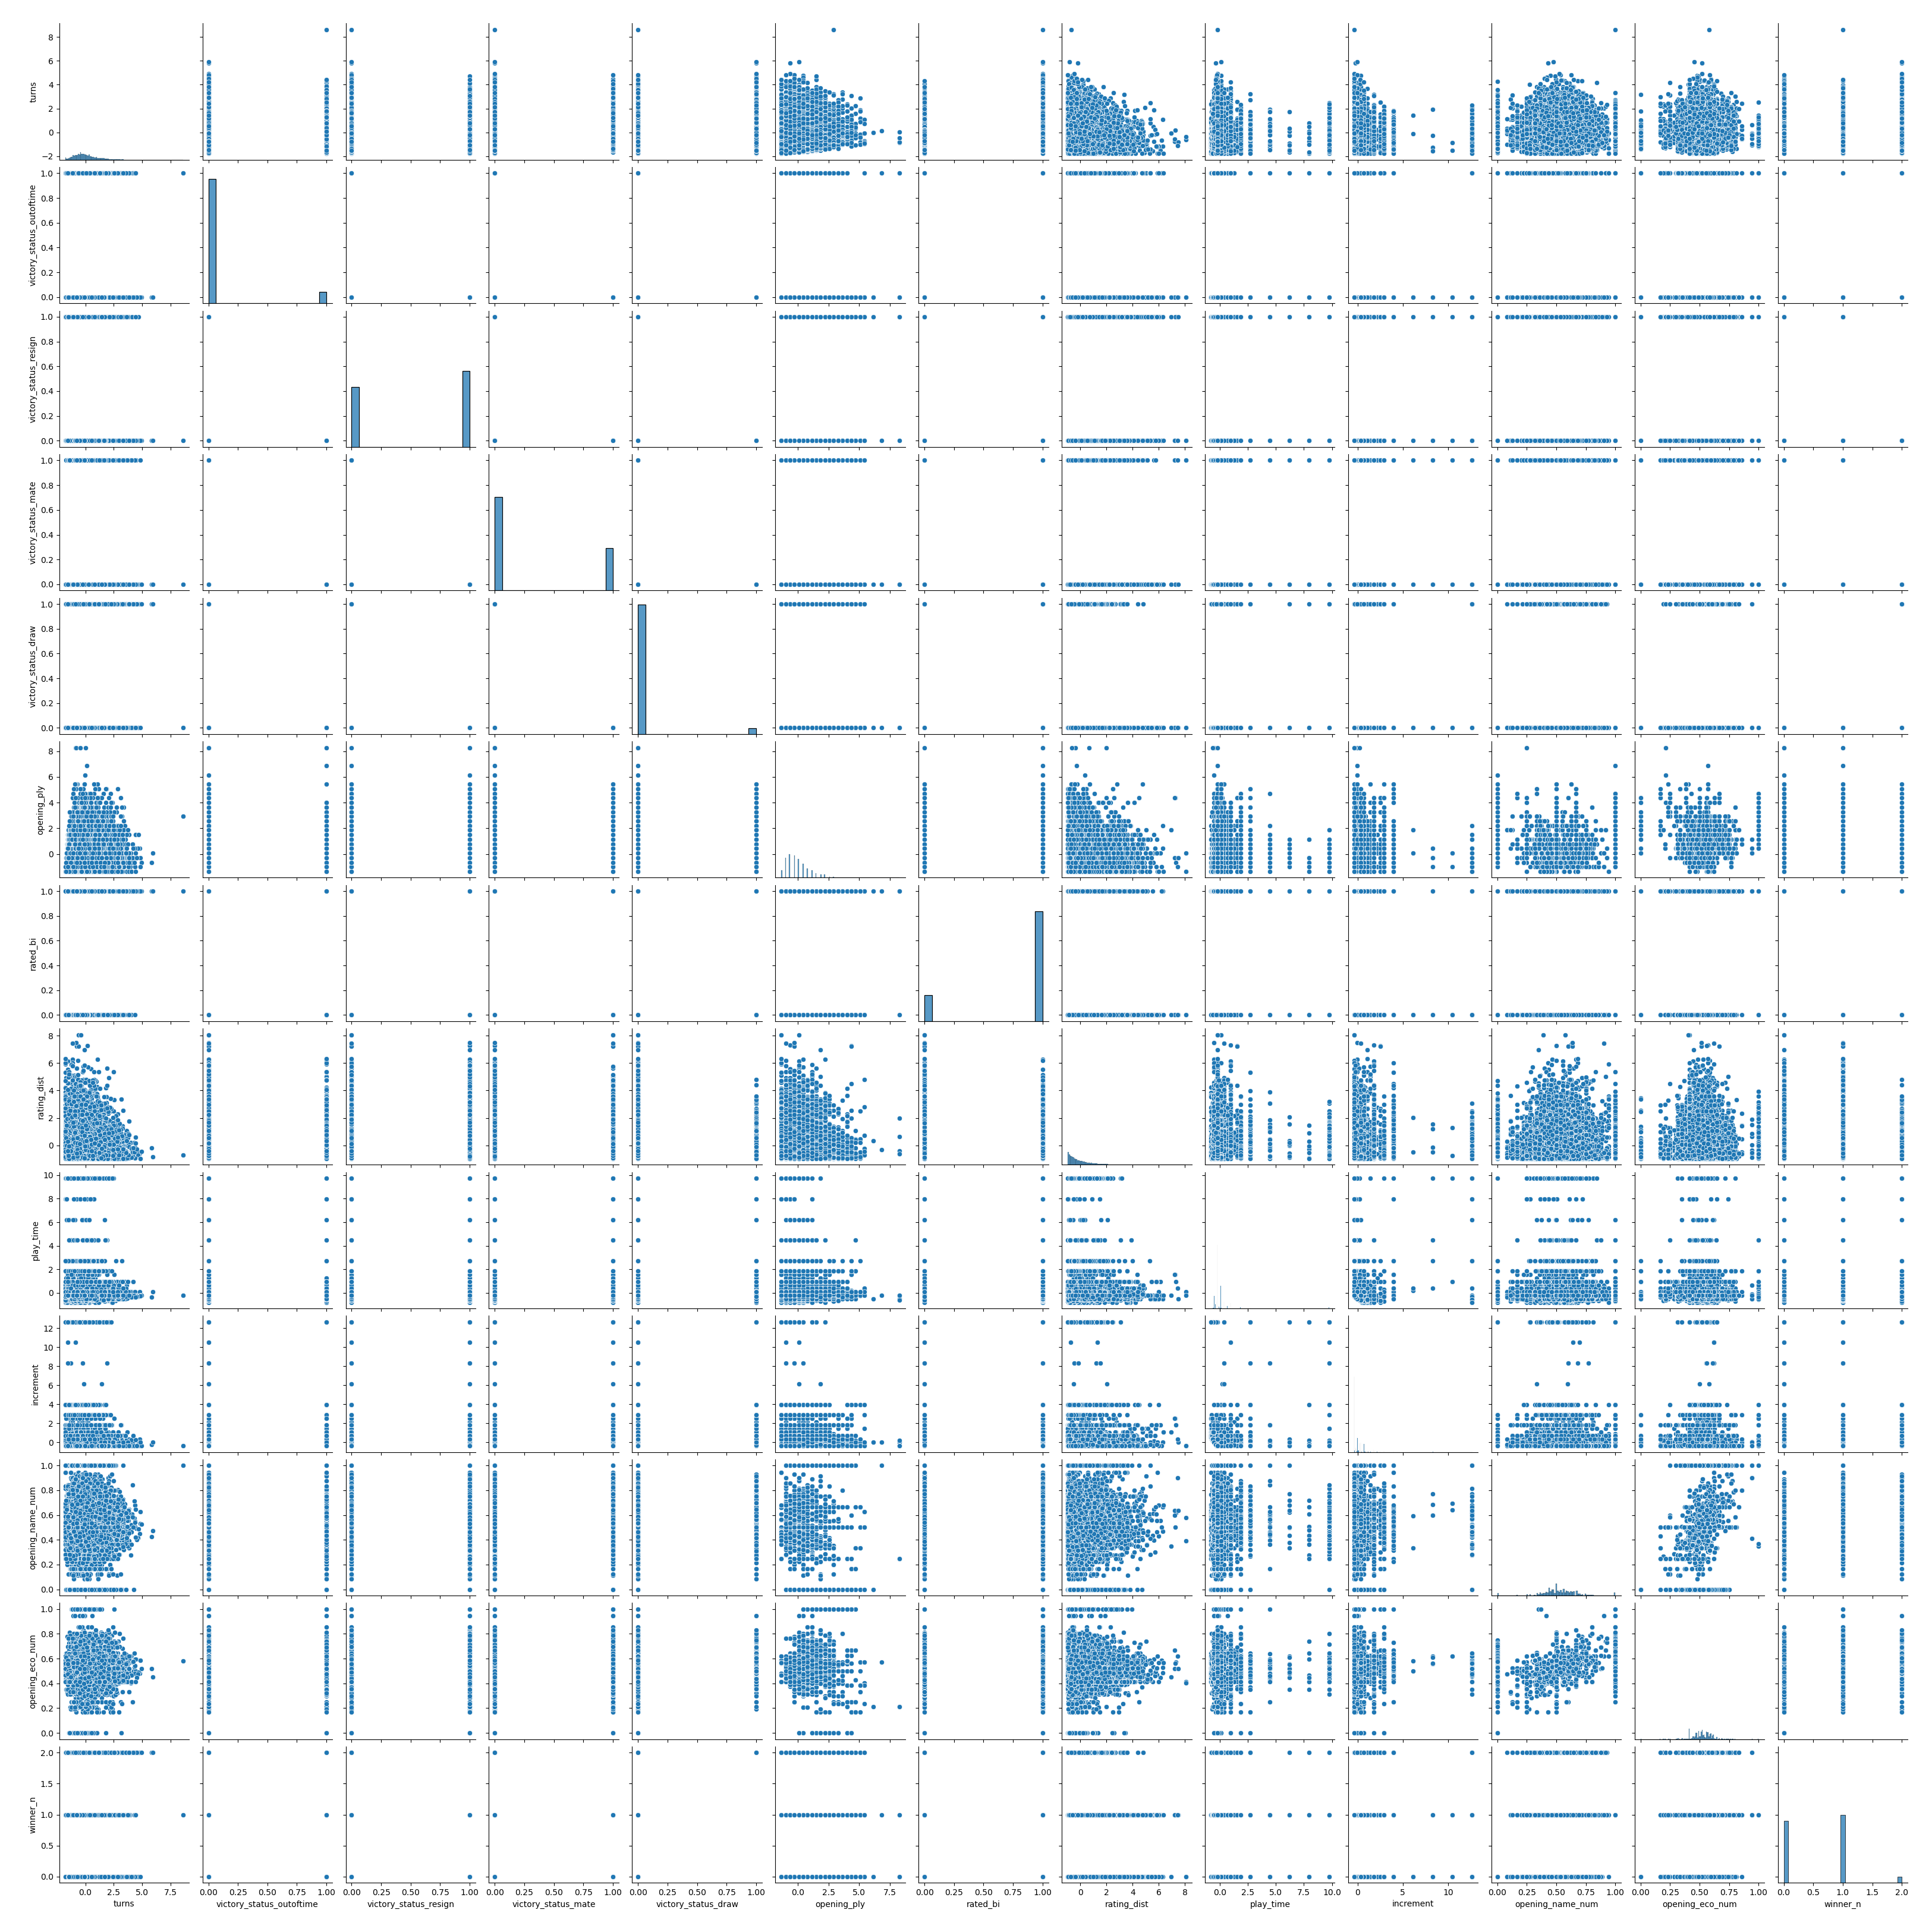

In [46]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

## MODELING ##

### DESCRIPCIÓ OBJECTIU ###

Com ja he especificat anteriorment, l'atribut objectiu és 'winner_n', que especifica quin ha sigut el resultat de la partida (guanyada pel jugador blanc(1)/negre(0) o empat(0.5)). Per tant es planteja un problema de classificació, on a partir de les dades dels altres atributs es vol predir el guanyador

### MODELS ###

Per avaluar els models, primer aplicaré crossvalidation per evitar l'overfitting, i si no hi ha cap resultat extrany avaluaré cada model amb diferents mètriques.

In [48]:
# Divide the data. First by setting X, y and then split in train and test

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y = dataset["winner_n"].values
X = dataset.drop(["winner_n"],axis=1) 

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

#### KNN MODEL ####

In [49]:
# KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

import warnings
warnings.filterwarnings('ignore')

# Busqueda de la millor k

accuracy = []
t = []
kl = []

for k in range(1,101):
    
    i = time.time()

    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_test)
    acc = accuracy_score(y_test, pred)
    
    f = time.time()
    accuracy.append(acc)
    kl.append(k)
    t.append(f-i)
    
print("Max accuracy: ", max(accuracy), " with k = ", accuracy.index(max(accuracy)), " and time = ", t[accuracy.index(max(accuracy))])

Max accuracy:  0.5729232056915673  with k =  75  and time =  0.37720417976379395


<IPython.core.display.Javascript object>


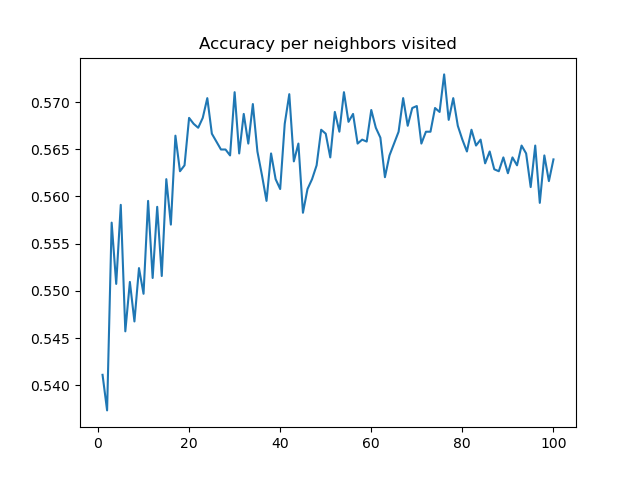

<IPython.core.display.Javascript object>


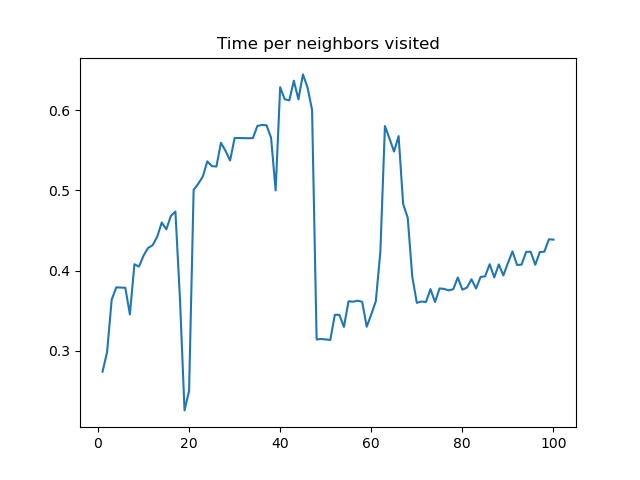

In [50]:
plt.figure()
plt.plot(kl, accuracy)
plt.title("Accuracy per neighbors visited")

plt.figure()
plt.plot(kl, t)
plt.title("Time per neighbors visited")

plt.show()

In [59]:
# best a priori -> k = 75

# crossvalidation - 5 kfolds

KNN = KNeighborsClassifier(n_neighbors = 75)
#KNN.fit(x_train, y_train)
scores = cross_val_score(KNN, X, y, cv=5, error_score = 'raise')

print(scores)
print("KNN mean accuracy:", scores.mean())

[0.57467957 0.56133926 0.56630918 0.5685505  0.55913134]
KNN mean accuracy: 0.5660019713231477


#### RANDOM FOREST CLASSIFIER MODEL ####

In [52]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
#RF.fit(x_train, y_train)
scores = cross_val_score(RF, X, y, cv=5, error_score = 'raise')

print(scores)
print("Random forest mean accuracy:", scores.mean())

[0.63274915 0.64085796 0.65786032 0.64573522 0.64311879]
Random forest mean accuracy: 0.644064287418422


#### NAIVE BAYES MODEL ####

In [53]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()  
#NB.fit(x_train, y_train)  
scores = cross_val_score(NB, X, y, cv=5, error_score = 'raise')

print(scores)
print("Naive Bayes accuracy:", scores.mean())

[0.62333246 0.61783939 0.63928852 0.61721612 0.6177394 ]
Naive Bayes accuracy: 0.6230831784211703


#### DECISION TREE MODEL ####

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [55]:
DT = DecisionTreeClassifier()
#DT_gini.fit(x_train, y_train)
scores = cross_val_score(DT, X, y, cv=5, error_score = 'raise')

print(scores)
print("Decision Tree Classifier accuracy:", scores.mean())

[0.6714622  0.72927021 0.73267068 0.71245421 0.73312402]
Decision Tree Classifier accuracy: 0.7157962635747472


#### SUPPORT VECTOR MACHINE ####

In [56]:
from sklearn import svm
from sklearn.svm import SVC

In [57]:
# Linear Kernel

svm_linear = SVC(kernel= "linear")
scores = cross_val_score(svm_linear, X, y, cv=5, error_score = 'raise')

print(scores)
print("SVM with linear kernel test accuracy:",scores.mean())

[0.63144128 0.6301334  0.64765891 0.6274202  0.62872841]
SVM with linear kernel test accuracy: 0.6330764398960655


#### LOGISTIC REGRESSION  ####

In [58]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
#logmodel.fit(x_train,y_train)
scores = cross_val_score(logmodel, X, y, cv=5, error_score = 'raise')

print(scores)
print("Logistic Regression mean accuracy:", scores.mean())

[0.63248758 0.62882553 0.64164269 0.6329147  0.63134485]
Logistic Regression mean accuracy: 0.6334430687705976


### MODEL COMPARISION ###

In [60]:
# funció per evaluar models

from sklearn import metrics


def evaluate_model(model, x_test, y_test):
    

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred) 
    prec = metrics.precision_score(y_test, y_pred, average='weighted')
    rec = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    fpr = [None]*3
    tpr = [None]*3
    auc = [None]*3
    for i in range(3):
        y_pred_proba = model.predict_proba(x_test)[::,i]
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test == i, y_pred_proba)
        auc[i] = metrics.roc_auc_score(y_test == i, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

Després de veure que no hi ha overfitting, compararé el rendiment dels diferents models utilitzant la funció anterior.

Accuracy: 0.5689474785519983
Precision: 0.5733399423050524
Recall: 0.5689474785519983
F1 Score: 0.5627712917298339
Cohens Kappa Score: 0.19808375647852616
Area Under Curve: [0.6097652987507268, 0.6134969980856292, 0.9975722358560642]


<IPython.core.display.Javascript object>


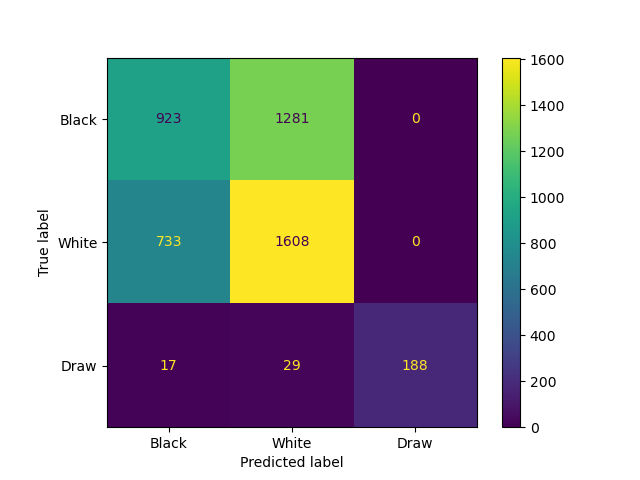

In [61]:
# KNN

KNN = KNeighborsClassifier(n_neighbors = 75)
KNN.fit(x_train, y_train)
KNN_eval = evaluate_model(KNN, x_test, y_test)

# Print result
print('Accuracy:', KNN_eval['acc'])
print('Precision:', KNN_eval['prec'])
print('Recall:', KNN_eval['rec'])
print('F1 Score:', KNN_eval['f1'])
print('Cohens Kappa Score:', KNN_eval['kappa'])
print('Area Under Curve:', KNN_eval['auc'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = KNN_eval['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

Accuracy: 0.6369533375183093
Precision: 0.6380223377519578
Recall: 0.6369533375183093
F1 Score: 0.6366438802447468
Cohens Kappa Score: 0.3308305416182774
Area Under Curve: [0.7028415237960989, 0.7048597617321359, 0.9917651594219251]


<IPython.core.display.Javascript object>


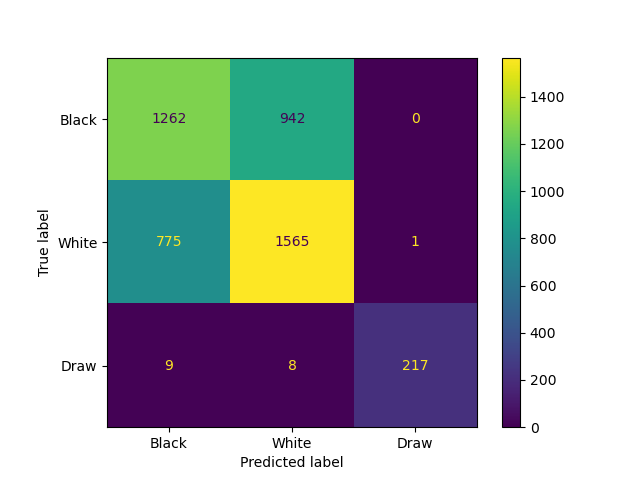

In [62]:
# Random Forest

RF = RandomForestClassifier()
RF.fit(x_train, y_train)
RF_eval = evaluate_model(RF, x_test, y_test)

# Print result
print('Accuracy:', RF_eval['acc'])
print('Precision:', RF_eval['prec'])
print('Recall:', RF_eval['rec'])
print('F1 Score:', RF_eval['f1'])
print('Cohens Kappa Score:', RF_eval['kappa'])
print('Area Under Curve:', RF_eval['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_eval['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

Accuracy: 0.6229336681314083
Precision: 0.6240509254149391
Recall: 0.6229336681314083
F1 Score: 0.6234463814731384
Cohens Kappa Score: 0.3064904636940534
Area Under Curve: [0.6882605324828643, 0.6944607294653673, 0.9991730369618158]


<IPython.core.display.Javascript object>


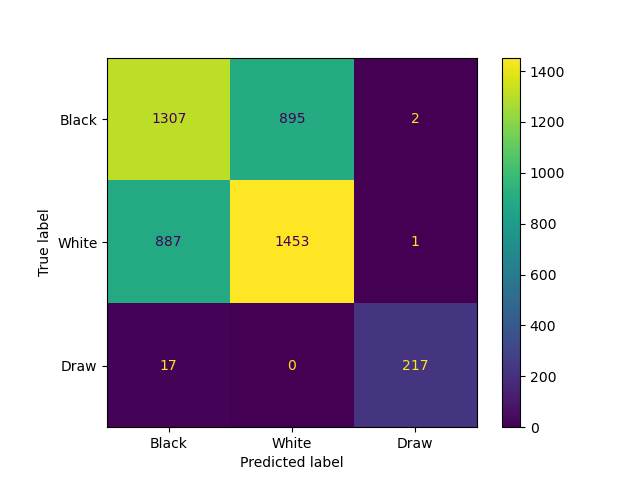

In [63]:
# Naive Bayes

NB = GaussianNB()  
NB.fit(x_train, y_train) 
NB_eval = evaluate_model(NB, x_test, y_test)

# Print result
print('Accuracy:', NB_eval['acc'])
print('Precision:', NB_eval['prec'])
print('Recall:', NB_eval['rec'])
print('F1 Score:', NB_eval['f1'])
print('Cohens Kappa Score:', NB_eval['kappa'])
print('Area Under Curve:', NB_eval['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = NB_eval['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

Accuracy: 0.7072609332496338
Precision: 0.7069242879687455
Recall: 0.7072609332496338
F1 Score: 0.7069226538997783
Cohens Kappa Score: 0.46283892328698983
Area Under Curve: [0.7074344087537223, 0.7116201576981854, 0.9657484979267157]


<IPython.core.display.Javascript object>


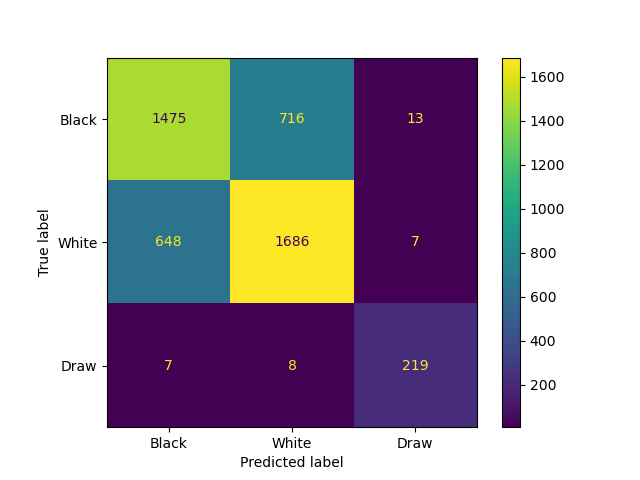

In [64]:
# Decision Tree

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_eval = evaluate_model(DT, x_test, y_test)

# Print result
print('Accuracy:', DT_eval['acc'])
print('Precision:', DT_eval['prec'])
print('Recall:', DT_eval['rec'])
print('F1 Score:', DT_eval['f1'])
print('Cohens Kappa Score:', DT_eval['kappa'])
print('Area Under Curve:', DT_eval['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_eval['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

Accuracy: 0.6415568110483365
Precision: 0.6428542855250273
Recall: 0.6415568110483365
F1 Score: 0.6409370862848692
Cohens Kappa Score: 0.33892552495385597
Area Under Curve: [0.7045116557715011, 0.7075606611675666, 0.973021917576373]


<IPython.core.display.Javascript object>


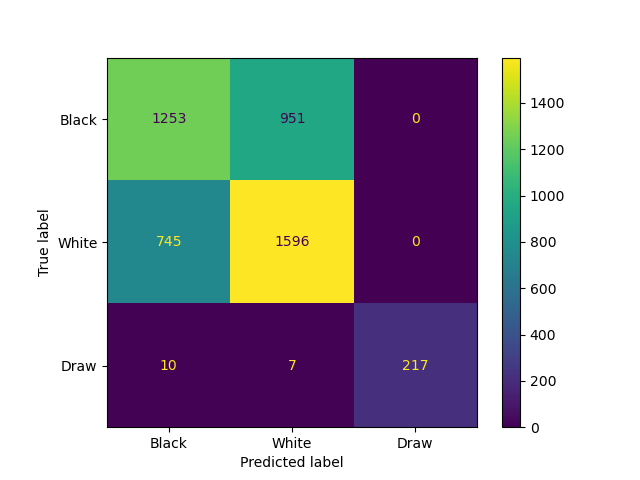

In [65]:
# SVM linear kernel

SVM = SVC(kernel= "linear", random_state=1, probability=True)
SVM.fit(x_train,y_train)
SVM_eval = evaluate_model(SVM, x_test, y_test)

# Print result
print('Accuracy:', SVM_eval['acc'])
print('Precision:', SVM_eval['prec'])
print('Recall:', SVM_eval['rec'])
print('F1 Score:', SVM_eval['f1'])
print('Cohens Kappa Score:', SVM_eval['kappa'])
print('Area Under Curve:', SVM_eval['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = SVM_eval['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

Accuracy: 0.6398828206737811
Precision: 0.6411393044400852
Recall: 0.6398828206737811
F1 Score: 0.6394266263161166
Cohens Kappa Score: 0.33595573737442086
Area Under Curve: [0.7045666308388984, 0.7073279790754321, 0.9993277105488327]


<IPython.core.display.Javascript object>


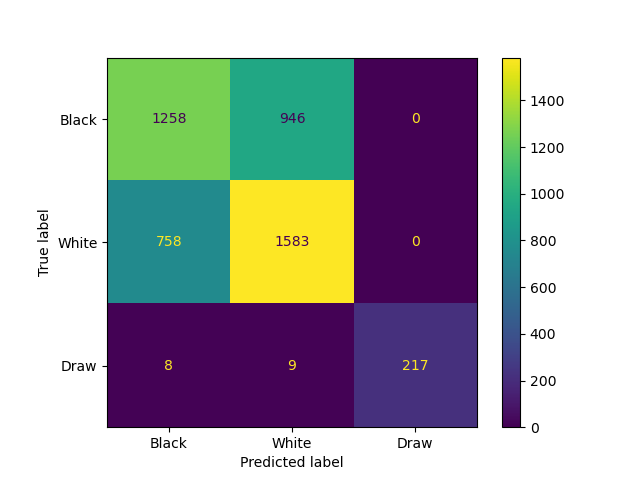

In [66]:
# Logistic Regression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LR_eval = evaluate_model(LR, x_test, y_test)

# Print result
print('Accuracy:', LR_eval['acc'])
print('Precision:', LR_eval['prec'])
print('Recall:', LR_eval['rec'])
print('F1 Score:', LR_eval['f1'])
print('Cohens Kappa Score:', LR_eval['kappa'])
print('Area Under Curve:', LR_eval['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_eval['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

Per comparar els models crearé 2 plots; un que mostrarà el 'accuracy', 'precision', 'recall', 'f1', 'kappa score' de tots els models, i l'altre que mostrarà el 'AUC' dels models.

<IPython.core.display.Javascript object>


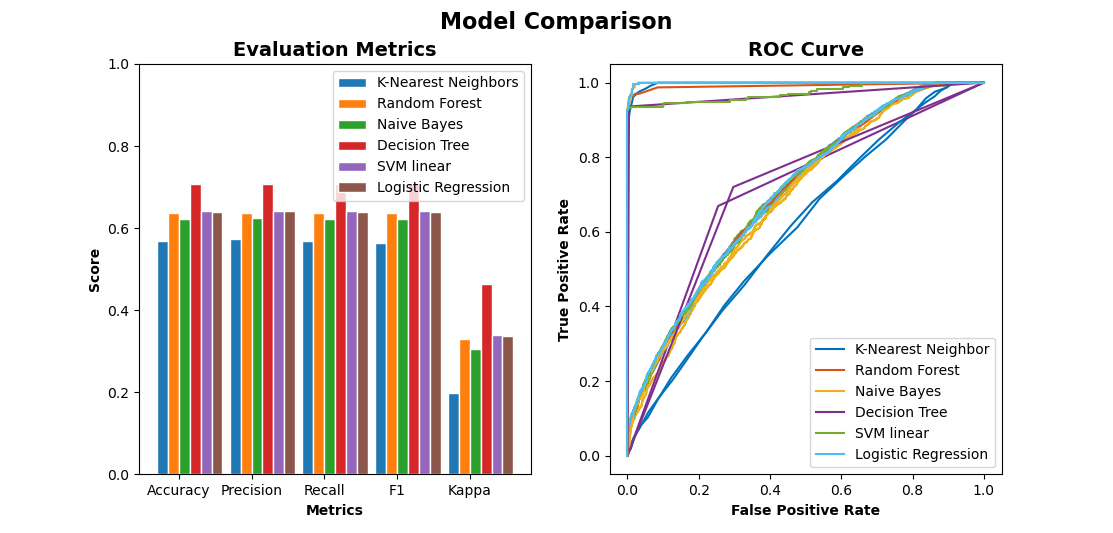

In [67]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15
KNN_score = [KNN_eval['acc'], KNN_eval['prec'], KNN_eval['rec'], KNN_eval['f1'], KNN_eval['kappa']]
RF_score = [RF_eval['acc'], RF_eval['prec'], RF_eval['rec'], RF_eval['f1'], RF_eval['kappa']]
NB_score = [NB_eval['acc'], NB_eval['prec'], NB_eval['rec'], NB_eval['f1'], NB_eval['kappa']]
DT_score = [DT_eval['acc'], DT_eval['prec'], DT_eval['rec'], DT_eval['f1'], DT_eval['kappa']]
SVM_score = [SVM_eval['acc'], SVM_eval['prec'], SVM_eval['rec'], SVM_eval['f1'], SVM_eval['kappa']]
LR_score = [LR_eval['acc'], LR_eval['prec'], LR_eval['rec'], LR_eval['f1'], LR_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(KNN_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, KNN_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r2, RF_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, NB_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, DT_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r5, SVM_score, width=barWidth, edgecolor='white', label='SVM linear')
ax1.bar(r6, LR_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(LR_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve

for i in range(3):
    ax2.plot(KNN_eval['fpr'][i], KNN_eval['tpr'][i], '#0072BD')
    ax2.plot(RF_eval['fpr'][i], RF_eval['tpr'][i], '#D95319')
    ax2.plot(NB_eval['fpr'][i], NB_eval['tpr'][i], '#EDB120')
    ax2.plot(DT_eval['fpr'][i], DT_eval['tpr'][i], '#7E2F8E')
    ax2.plot(SVM_eval['fpr'][i], SVM_eval['tpr'][i], '#77AC30')
    ax2.plot(LR_eval['fpr'][i], LR_eval['tpr'][i], '#4DBEEE')

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(['K-Nearest Neighbor', 'Random Forest', 'Naive Bayes', 'Decision Tree', 'SVM linear', 'Logistic Regression'], loc=4)

plt.show()

En la ROC curve hi ha una línia per cada possible resultat (guanya blanc/negre o empat) per cada model, per això n'hi ha tantes.

Podemm veure que el millor model és el Decision Tree, sent el que té el millor rendiment en totes les mètriques, així que escullo el Decision Tree per resoldre el problema.

### MODEL OPTIMISATION ###


Per començar, aplicaré un grid search sobre el model escollit.

In [68]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [69]:
# Grid Search

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    #'max_depth': np.linspace(1, 32, 32, endpoint=True),
    #'max_features': [2, 3, 4, None],
    'random_state': range(1,10),
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "criterion": ['gini', 'entropy']
}

# Create a base model
DT_grids = DecisionTreeClassifier()

# Initiate the grid search model ( with crossvalidation, kfolds = 5)
grid_search = GridSearchCV(estimator=DT_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 990 candidates, totalling 4950 fits


{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 1}

Accuracy: 0.704331450094162
Precision: 0.7043659678451947
Recall: 0.704331450094162
F1 Score: 0.7042718603702975
Cohens Kappa Score: 0.45688936309439354
Area Under Curve: [0.7042968653639456, 0.7083994030162468, 0.9621350596598122]


<IPython.core.display.Javascript object>


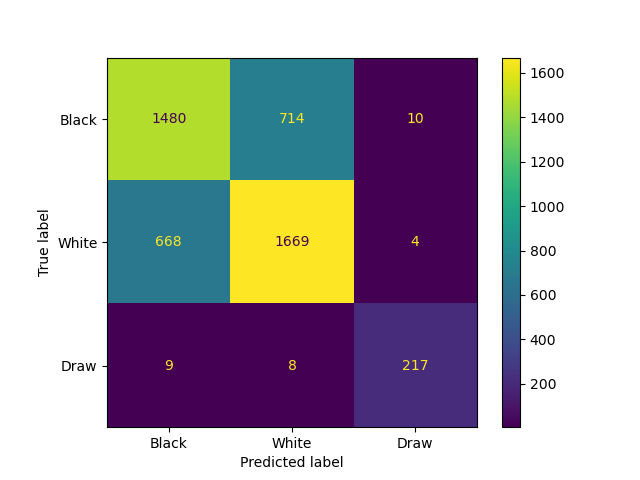

In [70]:
# Ara que s'ha trobat els millors paràmetres pel model, el tenim optimitzat a l'atribut 'best_estimator_'.
# L'avaluem

# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, x_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = best_grid_eval['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

<IPython.core.display.Javascript object>


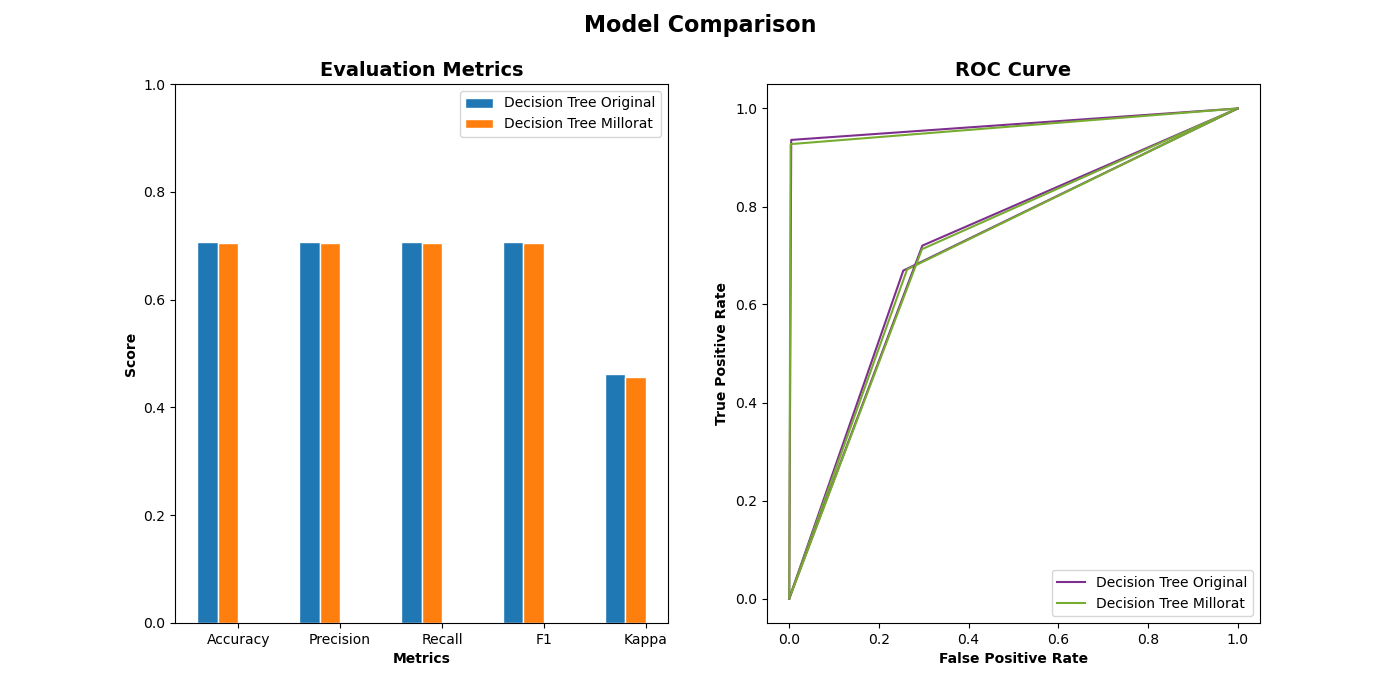

Canvi de -0.4142011834319465 % en accuracy.
Canvi de -0.36189450088096947 % en precisió.
Canvi de -0.4142011834319465 % en recall.
Canvi de -0.37497645815386893 % en F1 score.
Canvi de -1.2854494065329902 % en Kappa score.
Canvi de -0.41813667919018677 % en AUC.


In [71]:
# Comparem amb el Decision Tree original 

import statistics

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
DT_score = [DT_eval['acc'], DT_eval['prec'], DT_eval['rec'], DT_eval['f1'], DT_eval['kappa']]
BG_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

acc = (-DT_eval['acc'] + best_grid_eval['acc'])/DT_eval['acc'] * 100
prec = (-DT_eval['prec'] + best_grid_eval['prec'])/DT_eval['prec'] * 100
rec = (-DT_eval['rec'] + best_grid_eval['rec'])/DT_eval['rec'] * 100
f1 = (-DT_eval['f1'] + best_grid_eval['f1'])/DT_eval['f1'] * 100
kappa = (-DT_eval['kappa'] + best_grid_eval['kappa'])/DT_eval['kappa'] * 100
auc = (-statistics.mean(DT_eval['auc']) + statistics.mean(best_grid_eval['auc']))/statistics.mean(DT_eval['auc']) * 100
print("Canvi de", acc, "% en accuracy.")
print("Canvi de", prec, "% en precisió.")
print("Canvi de", rec, "% en recall.")
print("Canvi de", f1, "% en F1 score.")
print("Canvi de", kappa, "% en Kappa score.")
print("Canvi de", auc, "% en AUC.")

## Set position of bar on X axis
r1 = np.arange(len(KNN_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, DT_score, width=barWidth, edgecolor='white', label='Decision Tree Original')
ax1.bar(r2, BG_score, width=barWidth, edgecolor='white', label='Decision Tree Millorat')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(LR_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve

for i in range(3):
    ax2.plot(DT_eval['fpr'][i], DT_eval['tpr'][i], '#7E2F8E')
    ax2.plot(best_grid_eval['fpr'][i], best_grid_eval['tpr'][i], '#77AC30')

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(['Decision Tree Original', 'Decision Tree Millorat'], loc=4)

plt.show()

Veiem que el nou model no millora en cap aspecte al original

Com que el grid search no ha donat bons resultats, provaré de millorar el model mitjançant un 'pipeline', on aplicaré PCA abans del model.

[Pipeline] ............... (step 1 of 2) Processing pca, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.1s
Accuracy: 0.45595312826951245
Precision: 0.45556652368105366
Recall: 0.45595312826951245
F1 Score: 0.45571461140441893
Cohens Kappa Score: 0.0010062779005742817
Area Under Curve: [0.4971803252691488, 0.5003033803031105, 0.5193026995007193]


<IPython.core.display.Javascript object>


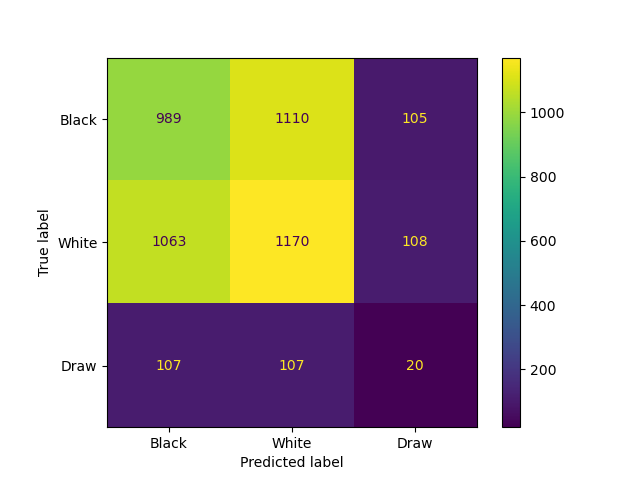

In [72]:
# Provarem de millorar el model mitjançant aplicar un 'pipeline' ()

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# The sequence of pipe flow is :
# PCA dimension is reduced by 2 >> Classification of decission tree
pipe = Pipeline([('pca', PCA(n_components = 2)),  ('decision_tree', DecisionTreeClassifier())], verbose = True)
 
# fitting the data in the pipeline
pipe.fit(x_train, y_train)
 
# Evaluate Model
pipe_model = evaluate_model(pipe, x_test, y_test)

# Print result
print('Accuracy:', pipe_model['acc'])
print('Precision:', pipe_model['prec'])
print('Recall:', pipe_model['rec'])
print('F1 Score:', pipe_model['f1'])
print('Cohens Kappa Score:', pipe_model['kappa'])
print('Area Under Curve:', pipe_model['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = pipe_model['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

Un cop creat el model aplicant PCA, li aplicaré un grid search.

In [73]:
pipe.get_params()

{'memory': None,
 'steps': [('pca', PCA(n_components=2)),
  ('decision_tree', DecisionTreeClassifier())],
 'verbose': True,
 'pca': PCA(n_components=2),
 'decision_tree': DecisionTreeClassifier(),
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 2,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'decision_tree__ccp_alpha': 0.0,
 'decision_tree__class_weight': None,
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': None,
 'decision_tree__max_features': None,
 'decision_tree__max_leaf_nodes': None,
 'decision_tree__min_impurity_decrease': 0.0,
 'decision_tree__min_samples_leaf': 1,
 'decision_tree__min_samples_split': 2,
 'decision_tree__min_weight_fraction_leaf': 0.0,
 'decision_tree__random_state': None,
 'decision_tree__splitter': 'best'}

[Pipeline] ............... (step 1 of 2) Processing pca, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.1s
Accuracy: 0.704331450094162
Precision: 0.7043659678451947
Recall: 0.704331450094162
F1 Score: 0.7042718603702975
Cohens Kappa Score: 0.45688936309439354
Area Under Curve: [0.7042968653639456, 0.7083994030162468, 0.9621350596598122]


<IPython.core.display.Javascript object>


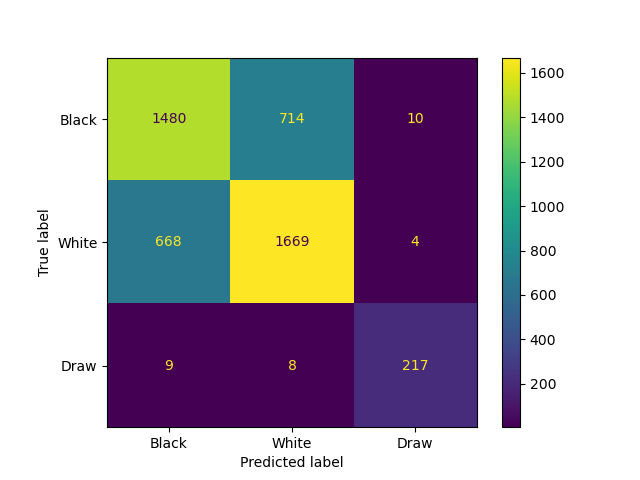

In [74]:
# Provarem de millorar el model mitjançant aplicar un 'pipeline' amb grid search

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# The sequence of pipe flow is :
# PCA dimension is reduced by 2 >> Classification of decission tree
pipe = Pipeline([('pca', PCA(n_components = 2)),  ('decision_tree', DecisionTreeClassifier())], verbose = True)

param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6],
    'decision_tree__min_samples_leaf': [1, 2, 3, 4, 5],
    'decision_tree__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "decision_tree__criterion": ['gini', 'entropy']
}
 
grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid ,scoring='roc_auc')

grid.fit(x_train, y_train)

# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval_pipe = evaluate_model(best_grid, x_test, y_test)

# Print result
print('Accuracy:', best_grid_eval_pipe['acc'])
print('Precision:', best_grid_eval_pipe['prec'])
print('Recall:', best_grid_eval_pipe['rec'])
print('F1 Score:', best_grid_eval_pipe['f1'])
print('Cohens Kappa Score:', best_grid_eval_pipe['kappa'])
print('Area Under Curve:', best_grid_eval_pipe['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = best_grid_eval_pipe['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

<IPython.core.display.Javascript object>


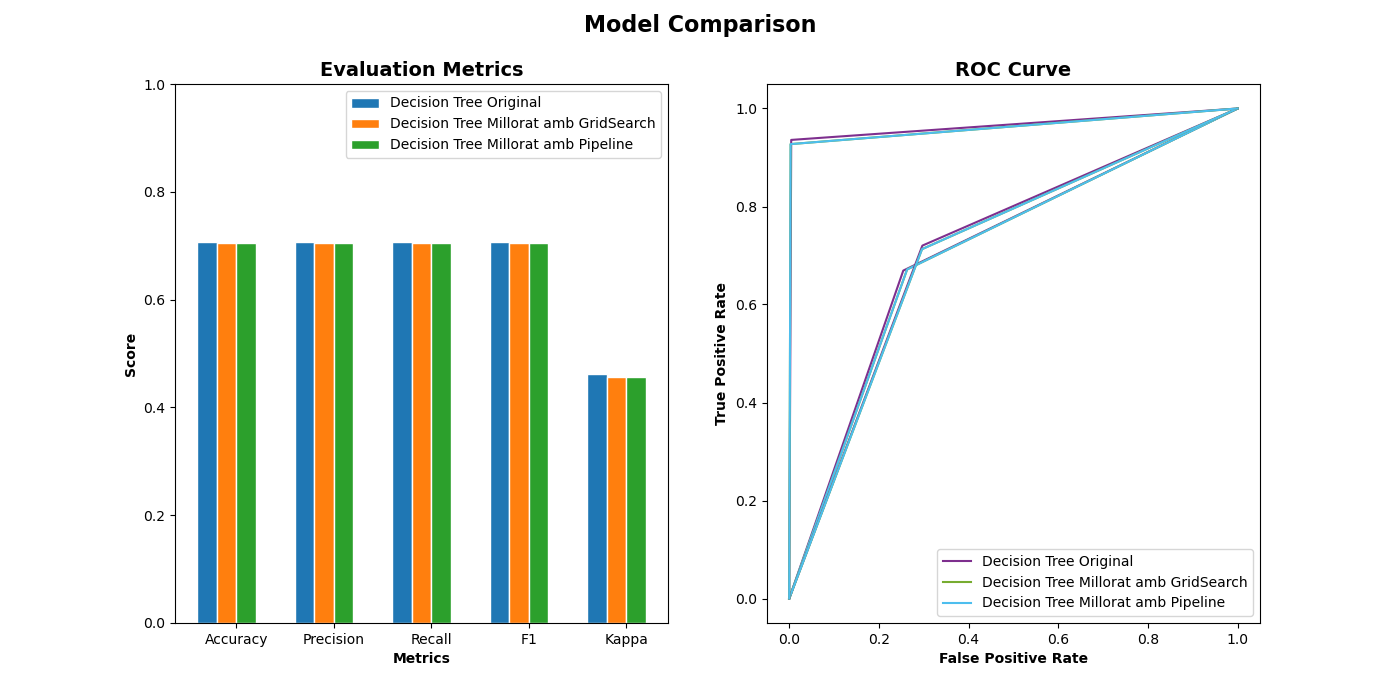

Canvi de l'Original al millorat amb GridSearch
Canvi de -0.4142011834319465 % en accuracy.
Canvi de -0.36189450088096947 % en precisió.
Canvi de -0.4142011834319465 % en recall.
Canvi de -0.37497645815386893 % en F1 score.
Canvi de -1.2854494065329902 % en Kappa score.
Canvi de -0.41813667919018677 % en AUC.

Canvi de l'Original al millorat amb Pipeline
Canvi de -0.4142011834319465 % en accuracy.
Canvi de -0.36189450088096947 % en precisió.
Canvi de -0.4142011834319465 % en recall.
Canvi de -0.37497645815386893 % en F1 score.
Canvi de -1.2854494065329902 % en Kappa score.
Canvi de -0.41813667919018677 % en AUC.


In [75]:
# Comparem amb el Decision Tree original i amb el de grid search només

import statistics

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
DT_score = [DT_eval['acc'], DT_eval['prec'], DT_eval['rec'], DT_eval['f1'], DT_eval['kappa']]
BG_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]
PP_score = [best_grid_eval_pipe['acc'], best_grid_eval_pipe['prec'], best_grid_eval_pipe['rec'], best_grid_eval_pipe['f1'], best_grid_eval_pipe['kappa']]

acc = (-DT_eval['acc'] + best_grid_eval['acc'])/DT_eval['acc'] * 100
prec = (-DT_eval['prec'] + best_grid_eval['prec'])/DT_eval['prec'] * 100
rec = (-DT_eval['rec'] + best_grid_eval['rec'])/DT_eval['rec'] * 100
f1 = (-DT_eval['f1'] + best_grid_eval['f1'])/DT_eval['f1'] * 100
kappa = (-DT_eval['kappa'] + best_grid_eval['kappa'])/DT_eval['kappa'] * 100
auc = (-statistics.mean(DT_eval['auc']) + statistics.mean(best_grid_eval['auc']))/statistics.mean(DT_eval['auc']) * 100
print("Canvi de l'Original al millorat amb GridSearch")
print("Canvi de", acc, "% en accuracy.")
print("Canvi de", prec, "% en precisió.")
print("Canvi de", rec, "% en recall.")
print("Canvi de", f1, "% en F1 score.")
print("Canvi de", kappa, "% en Kappa score.")
print("Canvi de", auc, "% en AUC.\n")

acc = (-DT_eval['acc'] + best_grid_eval_pipe['acc'])/DT_eval['acc'] * 100
prec = (-DT_eval['prec'] + best_grid_eval_pipe['prec'])/DT_eval['prec'] * 100
rec = (-DT_eval['rec'] + best_grid_eval_pipe['rec'])/DT_eval['rec'] * 100
f1 = (-DT_eval['f1'] + best_grid_eval_pipe['f1'])/DT_eval['f1'] * 100
kappa = (-DT_eval['kappa'] + best_grid_eval_pipe['kappa'])/DT_eval['kappa'] * 100
auc = (-statistics.mean(DT_eval['auc']) + statistics.mean(best_grid_eval_pipe['auc']))/statistics.mean(DT_eval['auc']) * 100
print("Canvi de l'Original al millorat amb Pipeline")
print("Canvi de", acc, "% en accuracy.")
print("Canvi de", prec, "% en precisió.")
print("Canvi de", rec, "% en recall.")
print("Canvi de", f1, "% en F1 score.")
print("Canvi de", kappa, "% en Kappa score.")
print("Canvi de", auc, "% en AUC.")

## Set position of bar on X axis
r1 = np.arange(len(DT_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, DT_score, width=barWidth, edgecolor='white', label='Decision Tree Original')
ax1.bar(r2, BG_score, width=barWidth, edgecolor='white', label='Decision Tree Millorat amb GridSearch')
ax1.bar(r3, PP_score, width=barWidth, edgecolor='white', label='Decision Tree Millorat amb Pipeline')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(DT_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve

for i in range(3):
    ax2.plot(DT_eval['fpr'][i], DT_eval['tpr'][i], '#7E2F8E')
    ax2.plot(best_grid_eval['fpr'][i], best_grid_eval['tpr'][i], '#77AC30')
    ax2.plot(best_grid_eval_pipe['fpr'][i], best_grid_eval_pipe['tpr'][i], '#4DBEEE')

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(['Decision Tree Original', 'Decision Tree Millorat amb GridSearch', 'Decision Tree Millorat amb Pipeline'], loc=4)

plt.show()

Podem observar que els resultats de les dos millores és el mateix, així que la decisió momentànea és que el millor model és el Decision Tree Classifier Original

Intentaré millorar la precisió del model mitjançant feature selection

In [76]:
dataset.head()

turns  victory_status_outoftime  victory_status_resign  \
0 -1.419                     1.000                  0.000   
1 -1.329                     0.000                  1.000   
2  0.015                     0.000                  0.000   
3  0.015                     0.000                  0.000   
4  1.030                     0.000                  0.000   

   victory_status_mate  victory_status_draw  opening_ply  rated_bi  \
0                0.000                0.000        0.066         0   
1                0.000                0.000       -0.292         1   
2                1.000                0.000       -0.649         1   
3                1.000                0.000       -0.649         1   
4                1.000                0.000        0.066         1   

   rating_dist  play_time  increment  opening_name_num  opening_eco_num  \
0        0.769      0.071     -0.228             0.368            0.453   
1       -0.627     -0.515      0.351             0.600            0.620   
2       -0.947     -0.515      0.351             0.465            0.467   
3       -0.885      0.364     -0.373             0.572            0.534   
4       -0.666      0.950     -0.155             0.645            0.596   

   winner_n  
0         1  
1         0  
2         1  
3         1  
4         1

Imported 0.2.03 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (19113, 13)
#### S

<IPython.core.display.Javascript object>


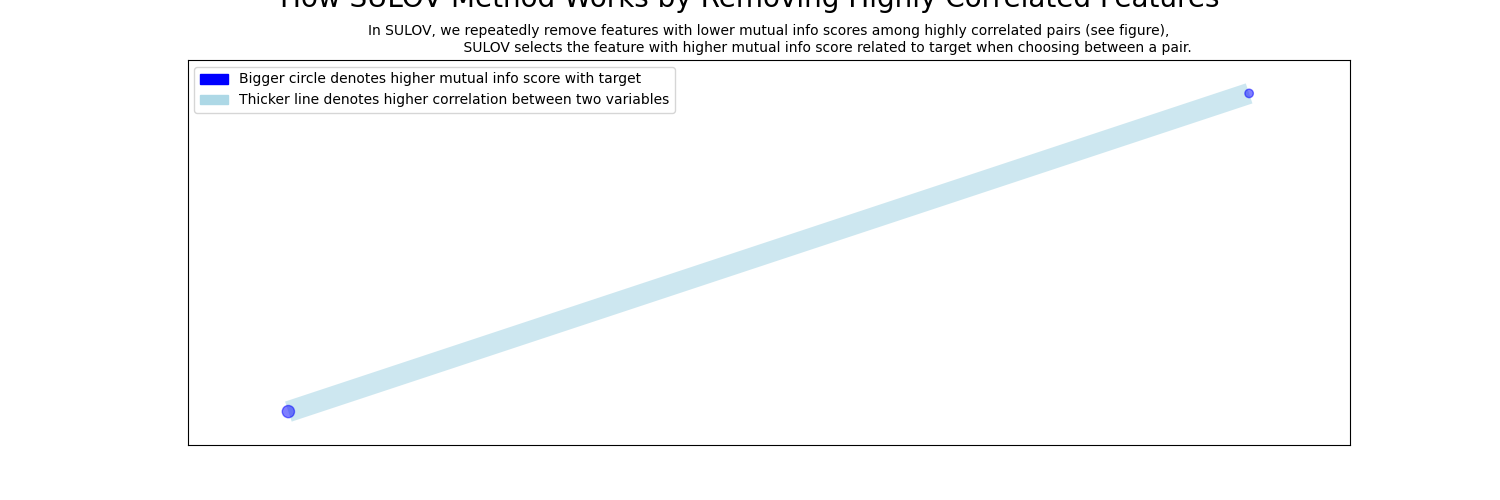

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 11
Final list of selected 11 vars after SULOV = ['increment', 'opening_eco_num', 'opening_name_num', 'opening_ply', 'play_time', 'rated_bi', 'rating_dist', 'turns', 'victory_status_draw', 'victory_status_outoftime', 'victory_status_resign']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 11 
    Taking top 3 features per iteration...
    XGBoost version using 1.7.2 as tree method: hist
Number of booster rounds = 100
        using 11 variables...
            selecting 5 features in this iteration
            Time taken for re

<IPython.core.display.Javascript object>


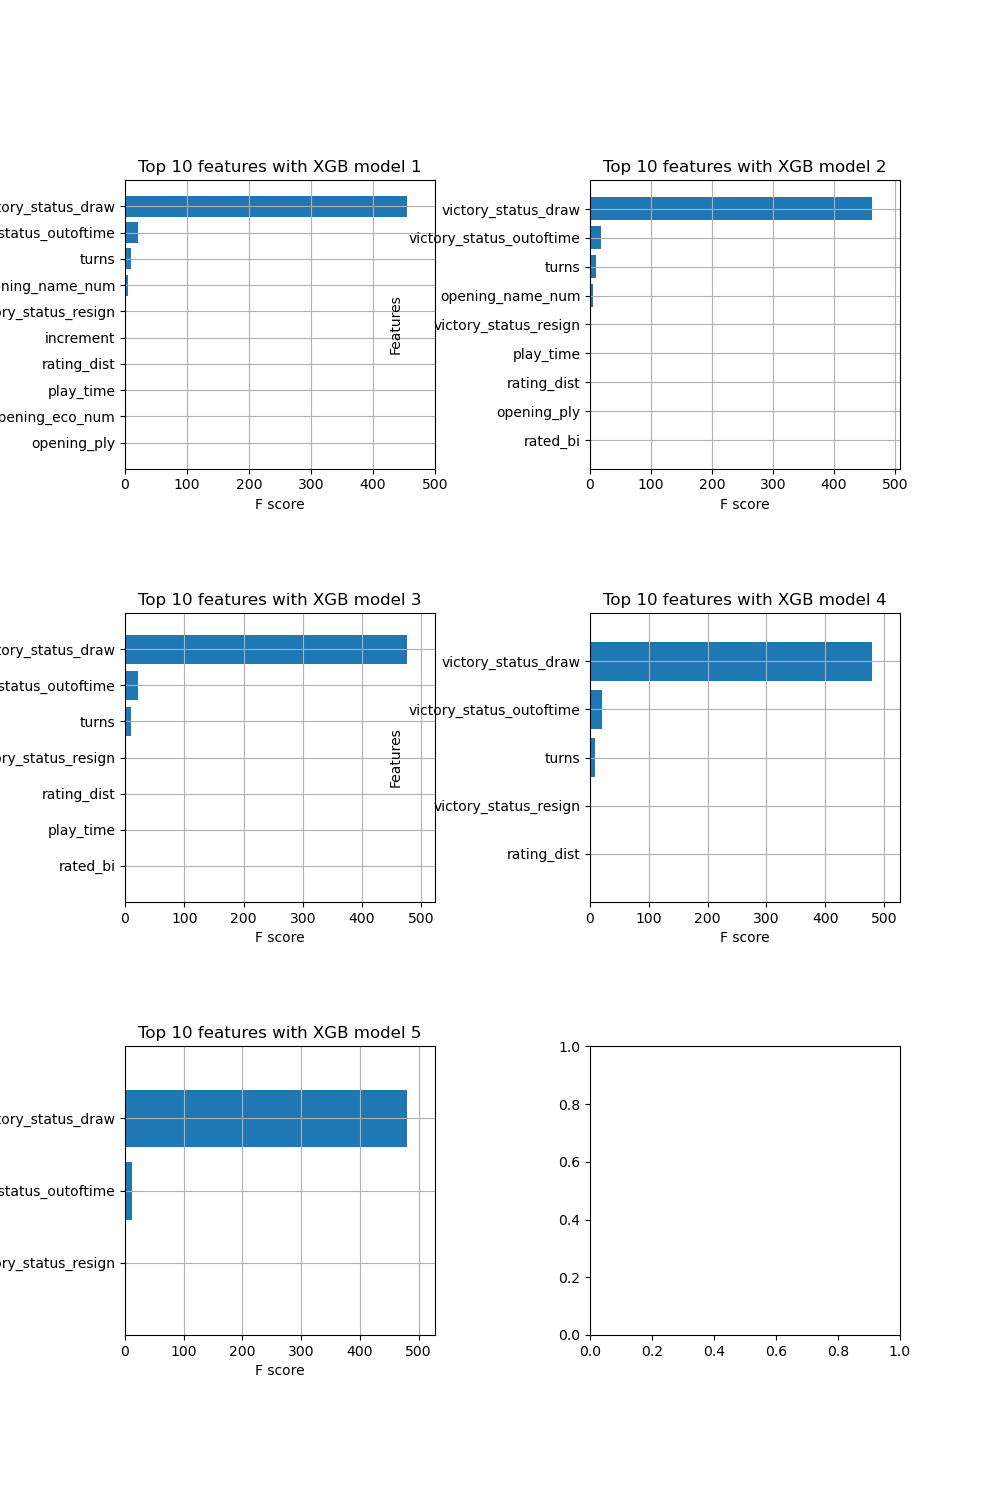

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 5 important features:
['victory_status_draw', 'victory_status_outoftime', 'turns', 'opening_name_num', 'victory_status_resign']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 5 important features and a train dataframe
['victory_status_draw', 'victory_status_outoftime', 'turns', 'opening_name_num', 'victory_status_resign']


In [77]:
from featurewiz import featurewiz

target = 'winner_n'
 
features, train = featurewiz(dataset, target, corr_limit=0.7, verbose=2, sep=",",header=0,test_data="", feature_engg="", category_encoders="")
print(features)

In [80]:
X_feat = train.drop('winner_n', axis = 1)
y_feat = train.winner_n.values
X_feat.head()

victory_status_draw  victory_status_outoftime  turns  opening_name_num  \
0                0.000                     1.000 -1.419             0.368   
1                0.000                     0.000 -1.329             0.600   
2                0.000                     0.000  0.015             0.465   
3                0.000                     0.000  0.015             0.572   
4                0.000                     0.000  1.030             0.645   

   victory_status_resign  
0                  0.000  
1                  1.000  
2                  0.000  
3                  0.000  
4                  0.000

In [81]:
# Evaluem aplicant cross validation

DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X_feat, y_feat, cv=5, error_score = 'raise')

print(scores)
print("Random forest mean accuracy:", scores.mean())

[0.82055977 0.80931206 0.80643474 0.80193616 0.8021978 ]
Random forest mean accuracy: 0.8080881053602551


Accuracy: 0.8043523749738439
Precision: 0.8045103753706467
Recall: 0.8043523749738439
F1 Score: 0.8044216218336457
Cohens Kappa Score: 0.6408661138803473
Area Under Curve: [0.8146700614945466, 0.8191552904163362, 0.9711221122112211]


<IPython.core.display.Javascript object>


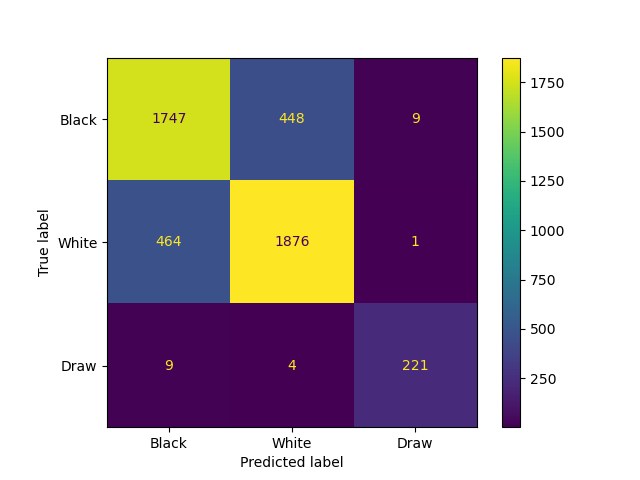

In [82]:
# Un cop hem vist que no hi ha overfitting evaluem el model amb la funció anetrior

x_feat_train, x_feat_test, y_feat_train, y_feat_test = train_test_split(X_feat,y_feat,test_size = 0.25, random_state=1)

DT = DecisionTreeClassifier()
DT.fit(x_feat_train,y_feat_train)
DT_eval_feat = evaluate_model(DT, x_feat_test, y_feat_test)

# Print result
print('Accuracy:', DT_eval_feat['acc'])
print('Precision:', DT_eval_feat['prec'])
print('Recall:', DT_eval_feat['rec'])
print('F1 Score:', DT_eval_feat['f1'])
print('Cohens Kappa Score:', DT_eval_feat['kappa'])
print('Area Under Curve:', DT_eval_feat['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_eval_feat['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

In [84]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Accuracy: 0.704331450094162
Precision: 0.7043659678451947
Recall: 0.704331450094162
F1 Score: 0.7042718603702975
Cohens Kappa Score: 0.45688936309439354
Area Under Curve: [0.7042968653639456, 0.7083994030162468, 0.9621350596598122]


<IPython.core.display.Javascript object>


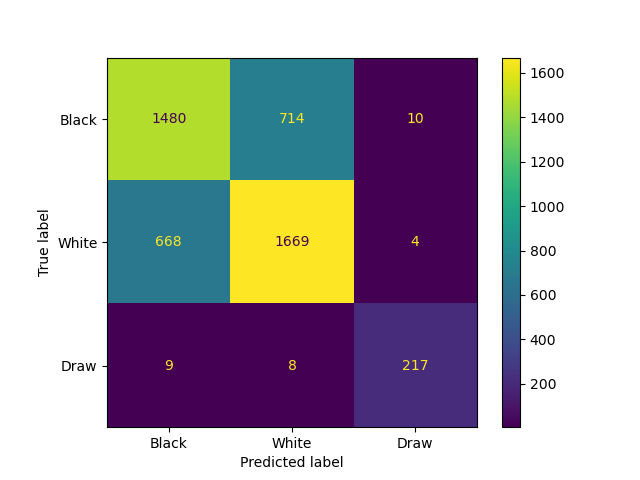

In [85]:
# Aplico gridsearch

param_grid = {
    #'max_depth': np.linspace(1, 32, 32, endpoint=True),
    #'max_features': [2, 3, 4, None],
    'random_state': range(1,10),
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "criterion": ['gini', 'entropy']
}
 
grid_feat = GridSearchCV(DT, cv=5, n_jobs=-1, param_grid=param_grid ,scoring='roc_auc')

grid_feat.fit(x_feat_train, y_feat_train)

# Select best model with best fit
best_grid_feat = grid_feat.best_estimator_

# Evaluate Model
best_grid_eval_pipe = evaluate_model(best_grid, x_test, y_test)

# Print result
print('Accuracy:', best_grid_eval_pipe['acc'])
print('Precision:', best_grid_eval_pipe['prec'])
print('Recall:', best_grid_eval_pipe['rec'])
print('F1 Score:', best_grid_eval_pipe['f1'])
print('Cohens Kappa Score:', best_grid_eval_pipe['kappa'])
print('Area Under Curve:', best_grid_eval_pipe['auc'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = best_grid_eval_pipe['cm'], display_labels = ['Black', 'White', 'Draw'])

cm_display.plot()
plt.show()

No millora així que em quedo amb el model anterior, el Decision Tree Classifier havent-l'hi aplicat Feature Selection

<IPython.core.display.Javascript object>


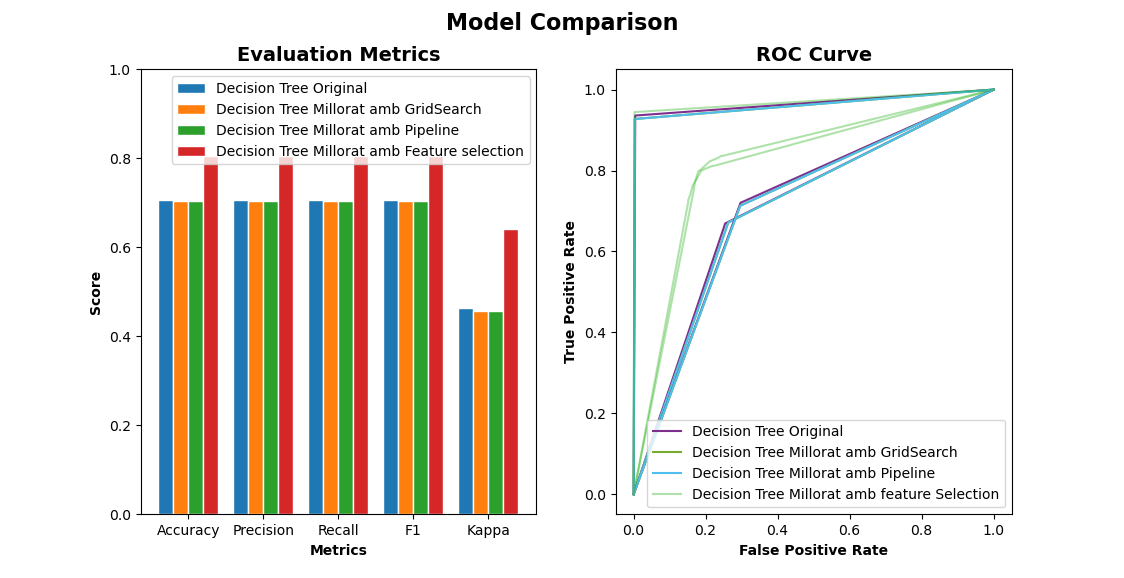

Canvi de l'Original al millorat amb GridSearch
Canvi de -0.4142011834319465 % en accuracy.
Canvi de -0.36189450088096947 % en precisió.
Canvi de -0.4142011834319465 % en recall.
Canvi de -0.37497645815386893 % en F1 score.
Canvi de -1.2854494065329902 % en Kappa score.
Canvi de -0.41813667919018677 % en AUC.

Canvi de l'Original al millorat amb Pipeline
Canvi de -0.4142011834319465 % en accuracy.
Canvi de -0.36189450088096947 % en precisió.
Canvi de -0.4142011834319465 % en recall.
Canvi de -0.37497645815386893 % en F1 score.
Canvi de -1.2854494065329902 % en Kappa score.
Canvi de -0.41813667919018677 % en AUC.

Canvi de l'Original al millorat amb Feature selection
Canvi de 13.727810650887582 % en accuracy.
Canvi de 13.80431950956192 % en precisió.
Canvi de 13.727810650887582 % en recall.
Canvi de 13.792027656209486 % en F1 score.
Canvi de 38.464178710174984 % en Kappa score.
Canvi de 9.231135393598661 % en AUC.


In [86]:
# Comparem amb el Decision Tree original 

import statistics

# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
DT_score = [DT_eval['acc'], DT_eval['prec'], DT_eval['rec'], DT_eval['f1'], DT_eval['kappa']]
BG_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]
PP_score = [best_grid_eval_pipe['acc'], best_grid_eval_pipe['prec'], best_grid_eval_pipe['rec'], best_grid_eval_pipe['f1'], best_grid_eval_pipe['kappa']]
DT_feat_score = [DT_eval_feat['acc'], DT_eval_feat['prec'], DT_eval_feat['rec'], DT_eval_feat['f1'], DT_eval_feat['kappa']]

acc = (-DT_eval['acc'] + best_grid_eval['acc'])/DT_eval['acc'] * 100
prec = (-DT_eval['prec'] + best_grid_eval['prec'])/DT_eval['prec'] * 100
rec = (-DT_eval['rec'] + best_grid_eval['rec'])/DT_eval['rec'] * 100
f1 = (-DT_eval['f1'] + best_grid_eval['f1'])/DT_eval['f1'] * 100
kappa = (-DT_eval['kappa'] + best_grid_eval['kappa'])/DT_eval['kappa'] * 100
auc = (-statistics.mean(DT_eval['auc']) + statistics.mean(best_grid_eval['auc']))/statistics.mean(DT_eval['auc']) * 100
print("Canvi de l'Original al millorat amb GridSearch")
print("Canvi de", acc, "% en accuracy.")
print("Canvi de", prec, "% en precisió.")
print("Canvi de", rec, "% en recall.")
print("Canvi de", f1, "% en F1 score.")
print("Canvi de", kappa, "% en Kappa score.")
print("Canvi de", auc, "% en AUC.\n")

acc = (-DT_eval['acc'] + best_grid_eval_pipe['acc'])/DT_eval['acc'] * 100
prec = (-DT_eval['prec'] + best_grid_eval_pipe['prec'])/DT_eval['prec'] * 100
rec = (-DT_eval['rec'] + best_grid_eval_pipe['rec'])/DT_eval['rec'] * 100
f1 = (-DT_eval['f1'] + best_grid_eval_pipe['f1'])/DT_eval['f1'] * 100
kappa = (-DT_eval['kappa'] + best_grid_eval_pipe['kappa'])/DT_eval['kappa'] * 100
auc = (-statistics.mean(DT_eval['auc']) + statistics.mean(best_grid_eval_pipe['auc']))/statistics.mean(DT_eval['auc']) * 100
print("Canvi de l'Original al millorat amb Pipeline")
print("Canvi de", acc, "% en accuracy.")
print("Canvi de", prec, "% en precisió.")
print("Canvi de", rec, "% en recall.")
print("Canvi de", f1, "% en F1 score.")
print("Canvi de", kappa, "% en Kappa score.")
print("Canvi de", auc, "% en AUC.\n")

acc = (-DT_eval['acc'] + DT_eval_feat['acc'])/DT_eval['acc'] * 100
prec = (-DT_eval['prec'] + DT_eval_feat['prec'])/DT_eval['prec'] * 100
rec = (-DT_eval['rec'] + DT_eval_feat['rec'])/DT_eval['rec'] * 100
f1 = (-DT_eval['f1'] + DT_eval_feat['f1'])/DT_eval['f1'] * 100
kappa = (-DT_eval['kappa'] + DT_eval_feat['kappa'])/DT_eval['kappa'] * 100
auc = (-statistics.mean(DT_eval['auc']) + statistics.mean(DT_eval_feat['auc']))/statistics.mean(DT_eval['auc']) * 100
print("Canvi de l'Original al millorat amb Feature selection")
print("Canvi de", acc, "% en accuracy.")
print("Canvi de", prec, "% en precisió.")
print("Canvi de", rec, "% en recall.")
print("Canvi de", f1, "% en F1 score.")
print("Canvi de", kappa, "% en Kappa score.")
print("Canvi de", auc, "% en AUC.")

## Set position of bar on X axis
r1 = np.arange(len(KNN_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, DT_score, width=barWidth, edgecolor='white', label='Decision Tree Original')
ax1.bar(r2, BG_score, width=barWidth, edgecolor='white', label='Decision Tree Millorat amb GridSearch')
ax1.bar(r3, PP_score, width=barWidth, edgecolor='white', label='Decision Tree Millorat amb Pipeline')
ax1.bar(r4, DT_feat_score, width=barWidth, edgecolor='white', label='Decision Tree Millorat amb Feature selection')


## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(LR_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve

for i in range(3):
    ax2.plot(DT_eval['fpr'][i], DT_eval['tpr'][i], '#7E2F8E')
    ax2.plot(best_grid_eval['fpr'][i], best_grid_eval['tpr'][i], '#77AC30')
    ax2.plot(best_grid_eval_pipe['fpr'][i], best_grid_eval_pipe['tpr'][i], '#4DBEEE')
    ax2.plot(DT_eval_feat['fpr'][i], DT_eval_feat['tpr'][i], "#11aa0055")

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(['Decision Tree Original', 'Decision Tree Millorat amb GridSearch', 'Decision Tree Millorat amb Pipeline', 'Decision Tree Millorat amb feature Selection'], loc=4)

plt.show()

Veiem clarament que el model millorat amb Feature Selection té un rendiment molt millor que els models anteriors.
Això ens indica que els atributs següents descriuen millor l'atribut objectiu sols que amb els altres:
* **Victory_status_draw**: 1 si el resultat de la partida és empat, 0 si no
* **Victory_status_outoftime**: 1 si la partida ha acabat perquè un jugador s'ha quedat sense temps, 0 si no
* **Turns**: nombre de torns que s'han jugat a la partida
* **Opening_name_num**: nom de la jugada inicial passat a numèric
* **Victory_status_resign**: 1 si la partida ha acabat perquè un jugador ha resignat, 0 si no

Així que el model final és el Decision Tree Classifier aplicat als atributs anteriors

### ALTRES PROBLEMES ###

#### PREDIR GUANYADOR SABENT EL OPENING ####

Volem saber amb quina precisió podem saber quin serà el resultat de la partida coneixent només el la jugada d'opening (i les dades que tenim fins llavors)

In [87]:
dataset_op = dataset.copy()

In [88]:
dataset_op = dataset_op.drop('turns', axis = 1)
dataset_op = dataset_op.drop('victory_status_outoftime', axis = 1)
dataset_op = dataset_op.drop('victory_status_resign', axis = 1)
dataset_op = dataset_op.drop('victory_status_mate', axis = 1)
dataset_op = dataset_op.drop('victory_status_draw', axis = 1)

dataset_op.head()

opening_ply  rated_bi  rating_dist  play_time  increment  opening_name_num  \
0        0.066         0        0.769      0.071     -0.228             0.368   
1       -0.292         1       -0.627     -0.515      0.351             0.600   
2       -0.649         1       -0.947     -0.515      0.351             0.465   
3       -0.649         1       -0.885      0.364     -0.373             0.572   
4        0.066         1       -0.666      0.950     -0.155             0.645   

   opening_eco_num  winner_n  
0            0.453         1  
1            0.620         0  
2            0.467         1  
3            0.534         1  
4            0.596         1

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (19113, 8)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
################

<IPython.core.display.Javascript object>


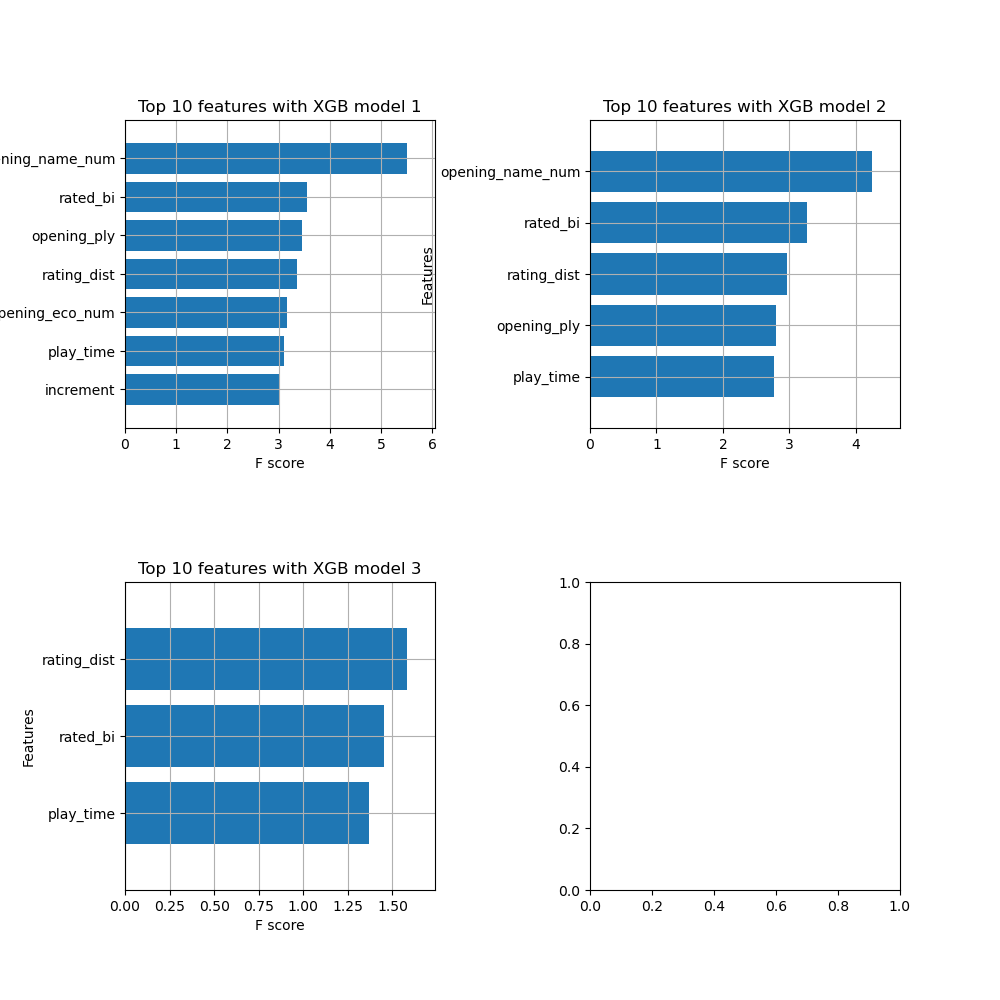

    Completed XGBoost feature selection in 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['opening_name_num', 'rated_bi', 'opening_ply', 'rating_dist']
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 4 important features and a train dataframe
['opening_name_num', 'rated_bi', 'opening_ply', 'rating_dist']


In [89]:
# Feature selection

target = 'winner_n'
 
features, train = featurewiz(dataset_op, target, corr_limit=0.7, verbose=2, sep=",",header=0,test_data="", feature_engg="", category_encoders="")
print(features)

In [90]:
X_op_feat = train.drop('winner_n', axis = 1)
y_op_feat = train.winner_n.values

DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X_op_feat, y_op_feat, cv=5, error_score = 'raise')

print(scores)
print("Random forest mean accuracy:", scores.mean())

[0.49568402 0.50693173 0.5124248  0.49215071 0.5       ]
Random forest mean accuracy: 0.5014382501023509


Donat que hi ha 3 resultats diferents a la partida, poder saber amb un 50% de precisió quin serà aquest resultat només tenint la informació de l'opening és un bon percentatge.

## TREBALL FUTUR ##

Amb aquest dataset hi ha molts problemes que es poden plantejar que no són els que m'he plantejat jo. Algunes idees són:

* Es podria millorar el model anterior que busca predir el guanyador sabent el la jugada inicial

* Es podria fer un model que predís el victory_status (com ha acabat la partida: a un jugador se li ha acabat el temps, mate, empat, rendició

* Es podria intentar calcular a partir de quin moviment s'ha perdut la partida